<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Aqueduct-Food-Widgets" data-toc-modified-id="Aqueduct-Food-Widgets-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Aqueduct Food Widgets</a></span></li><li><span><a href="#Widgets'-structure" data-toc-modified-id="Widgets'-structure-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Widgets' structure</a></span><ul class="toc-item"><li><span><a href="#All-crops-(staging)" data-toc-modified-id="All-crops-(staging)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>All crops (staging)</a></span></li><li><span><a href="#One-crop-(staging)" data-toc-modified-id="One-crop-(staging)-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>One crop (staging)</a></span></li></ul></li><li><span><a href="#Widget-Config" data-toc-modified-id="Widget-Config-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Widget Config</a></span><ul class="toc-item"><li><span><a href="#All-crops-(staging)" data-toc-modified-id="All-crops-(staging)-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>All crops (staging)</a></span></li><li><span><a href="#One-crop-(staging)" data-toc-modified-id="One-crop-(staging)-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>One crop (staging)</a></span></li></ul></li></ul></div>

# Aqueduct Food Widgets

In [25]:
import pandas as pd
import json
import requests
import numpy as np
import re
import ipywidgets as widgets
from vega import Vega
from IPython.display import display, HTML, JSON, Code, Markdown

%reload_ext version_information
%version_information vega, pandas, IPython, ipywidgets, re

Software versions
Python 3.7.4 64bit [Clang 10.0.1 (clang-1001.0.46.4)]
IPython 7.7.0
OS Darwin 18.6.0 x86_64 i386 64bit
vega 0.5.0
pandas 0.25.0
IPython 7.7.0
ipywidgets 7.5.1
re 2.2.1
Mon Aug 19 16:46:03 2019 CEST

In [148]:
envUrl='https://staging-api.globalforestwatch.org'

testscenario = {'year':2010,'iso':'ESP','crop':'banana', 'commodity':'banana', 'water_column':'ws2028tl', 'countryName':'Spain'}

def formatQuery(query: str, object2format: list):    
    n=query
    for paterns in object2format:
        n = re.compile(paterns['pattern']).sub(paterns['sub'], n)
    return n    
def formatObj(inputKey: dict, predefineKeys: dict)-> list:
    """
    converts input dictionary on regex definition for parsing parameters
    Output:

        object2format_Global= [
       {'pattern':r"({{([^}}]*)(year)}})", 'sub':'2010'},
       {'pattern':r"({{([^}}]*)(water_column)}})", 'sub':'ws2028tl'},
       {'pattern':r"({{([^}}]*)(crop)}})", 'sub':'banana'},
        {'pattern':r"({{([^}}]*)(commodity)}})", 'sub':'banana'},
       {'pattern':r"({{([^}}]*)(iso)}})", 'sub':'ESP'},
        {'pattern':r"({{([^}}]*)(countryName)}})", 'sub':'Spain'}
                   ]
    """
    
    object2format=[]
    if 'sql_config' in inputKey:
        for i in inputKey['sql_config']:
            sentence = ['{0} = {1}'.format(word['key'],predefineKeys[word['key']]) for word in i['key_params']]
            
            
            object2format.append({'pattern':r"({{([^}}]*)("+i['key']+")}})", 'sub': 'where {0} '.format(' and '.join(sentence))})
        
    if 'params_config' in inputKey:
         for i in inputKey['params_config']:
            object2format.append({'pattern':r"({{([^}}]*)("+i['key']+")}})", 'sub': str(predefineKeys[i['key']])})
    return object2format

def formatWidget2read(widgetConfig: dict, object2format: list):    
    n=json.dumps(widgetConfig)
    for paterns in object2format:
        n = re.compile(paterns['pattern']).sub(paterns['sub'], n)
    processedW = json.loads(n)
    return json.loads(n)

def getData(query, configP, predefineKeys):
    object2format = formatObj(configP, predefineKeys)
    payload = {'q': formatQuery(query, object2format)}
    r = requests.get('https://wri-rw.carto.com/api/v2/sql', params=payload)
    if r.status_code ==200:
        df = pd.read_json(json.dumps(r.json()['rows']), orient='records')
        return display(df.head(10))
    else:
        return display(r.text)

def visualizeWidget(widgetId: str, configP, predefineKeys):
    object2format = formatObj(configP, predefineKeys)
    widgetUrl=f"{envUrl}/v1/widget/{widgetId}"
    s=requests.get(widgetUrl)
    if s.status_code == 200:
        mywidget = s.json()['data']['attributes']['widgetConfig']
        mywidget['width']=300
        mywidget['height']=300
        mywidget['padding']="auto"
        return display(Vega(formatWidget2read(mywidget, object2format)))


In [149]:
def displayAQfwinfo(name, widgetID, sqlOld, confOld, sqlNew, confNew, visualize=True):
    display(Markdown(f'#### {name}'))
    display(Markdown(f'**Widget ID**: [{widgetID}]({envUrl}/v1/widget/{widgetID})  '))
    display(Markdown('**Old query:**'))
    display(Markdown(f""">```sql 
    {sqlOld} ``` """))
    display(Markdown(f""">```JSON
    {json.dumps(confOld, indent=2)}``` """))
    getData(sqlOld, confOld, testscenario)
    display(Markdown('**New query:**'))
    display(Markdown(f""">```sql 
    {sqlNew} ``` """))
    display(Markdown(f""">```JSON 
    {json.dumps(confNew, indent=2)} ``` """))
    getData(sqlNew, confNew, testscenario)
    if visualize:
        visualizeWidget(widgetID, confNew, testscenario)

# Widgets' structure

## All crops (staging)

### GLOBAL

- <a href="#World-Price">World Price</a>
    * **Widget_id:** [9391e42c-f32b-40d9-a282-3083e617464f](https://staging-api.globalforestwatch.org/v1/widget/9391e42c-f32b-40d9-a282-3083e617464f)
- <a href="#Average-global-change-in-seasonal-variability-for-rainfed-crops-through-2040">Average global change in seasonal variability for rainfed crops through 2040</a>
    * **Widget_id:** [abf5c0f9-4042-4ea6-9582-1b34209cb4ba](https://staging-api.globalforestwatch.org/v1/widget/abf5c0f9-4042-4ea6-9582-1b34209cb4ba)
- <a href="#Percent-of-crop-area-by-level-of-water-stress-and-volume-of-demand">Percent of crop area by level of water stress and volume of demand</a>
    * **Widget_id:** [7b29a2a5-515a-4e22-846f-03ad3d2c0a13](https://staging-api.globalforestwatch.org/v1/widget/7b29a2a5-515a-4e22-846f-03ad3d2c0a13)
- <a href="#Average-global-change-in-water-stress-for-irrigated-crops-through-2040">Average global change in water stress for irrigated crops through 2040</a>
    * **Widget_id:** [4f322f4a-dde6-4f63-b7c9-10b0ba0c1402](https://staging-api.globalforestwatch.org/v1/widget/4f322f4a-dde6-4f63-b7c9-10b0ba0c1402)
- <a href="#Irrigated-vs-Rainfed">Irrigated vs Rainfed</a>
    * **Widget_id:** [606c813b-d716-4b0b-8717-9389425c9262](https://staging-api.globalforestwatch.org/v1/widget/606c813b-d716-4b0b-8717-9389425c9262)
- <a href="#Percentage-of-crop-production-area-by-water-risk-in-year">Percentage of crop production area by water risk in year</a>
    * **Widget_id:** [7b37bd6e-a465-4c4d-98b3-1a110a66d27e](https://staging-api.globalforestwatch.org/v1/widget/7b37bd6e-a465-4c4d-98b3-1a110a66d27e)
    
### COUNTRY

- <a href="#Percent-of-crop-area-by-level-of-water-stress-and-volume-of-demand-in-country">Percent of crop area by level of water stress and volume of demand in country</a> 
    * **Widget_id:** [e2778762-4b3d-498c-8b4a-869ac834f406](https://staging-api.globalforestwatch.org/v1/widget/e2778762-4b3d-498c-8b4a-869ac834f406) 
- Percentage of country's population at high risk of hunger
    * **Widget_id:** [8f67fadd-d8df-4a28-82dd-a22a337d71b9](https://staging-api.globalforestwatch.org/v1/widget/8f67fadd-d8df-4a28-82dd-a22a337d71b9)
- Kilocalories per capita
    * **Widget_id:** [af969fd8-fd47-430d-ad13-9113e42e9fed](https://staging-api.globalforestwatch.org/v1/widget/af969fd8-fd47-430d-ad13-9113e42e9fed) 
- Volume of production, food demand, and net trade
    * **Widget_id:** [eb14a35e-50bc-44c0-88fd-199324550468](https://staging-api.globalforestwatch.org/v1/widget/eb14a35e-50bc-44c0-88fd-199324550468) 
- Percentage of {{crop_name}} area that {{year_verb}}
    * **Widget_id:** [25facdf3-acf6-4f0e-9a0a-5ec94216407f](https://staging-api.globalforestwatch.org/v1/widget/25facdf3-acf6-4f0e-9a0a-5ec94216407f) 
- Change in net trade over time for top 5 crops in highest demand in {{countryName}}
    * **Widget_id:** [88aefca0-e25c-4a16-80b3-f2831d2064e4](https://staging-api.globalforestwatch.org/v1/widget/88aefca0-e25c-4a16-80b3-f2831d2064e4) 
- <a href="#Percentage-of-crop-production-area-by-water-risk-in-year-in-country">Percentage of crop production area by water risk in year in country</a>
    * **Widget_id:** [962fad79-ec09-4258-b233-d4934bfbbf61](https://staging-api.globalforestwatch.org/v1/widget/962fad79-ec09-4258-b233-d4934bfbbf61) 

## One crop (staging)


### GLOBAL

- <a href="#Single-growing-crop-under-high-water-stress-conditions">Single growing crop under high water stress conditions</a>
    * **Widget_id:** [641970f9-84da-4560-a715-ad4f70a3b8f4](https://staging-api.globalforestwatch.org/v1/widget/641970f9-84da-4560-a715-ad4f70a3b8f4)
- Irrigated vs Rainfed
    * **Widget_id:** [606c813b-d716-4b0b-8717-9389425c9262](https://staging-api.globalforestwatch.org/v1/widget/606c813b-d716-4b0b-8717-9389425c9262) 
- Top 5 net importers and net exporters of {{commodity}}
    * **Widget_id:** [4a3582e3-65d8-4331-b397-f42ed5d190d0](https://staging-api.globalforestwatch.org/v1/widget/4a3582e3-65d8-4331-b397-f42ed5d190d0)
- Top 5 countries with the greatest projected irrigated yield increases through {{year}}
    * **Widget_id:** [38b2cde3-aab9-4310-834f-9ac2a96a91a7](https://staging-api.globalforestwatch.org/v1/widget/38b2cde3-aab9-4310-834f-9ac2a96a91a7)
- <a href="#Top-10-countries-with-the-highest-crop-water-stress-scores-in-year">Top 10 countries with the highest crop water stress scores in year</a>
    * **Widget_id:** [413a36b5-a7b4-4bb4-9491-98b5175b4e28](https://staging-api.globalforestwatch.org/v1/widget/413a36b5-a7b4-4bb4-9491-98b5175b4e28)
- <a href="#Top-10-countries-with-the-highest-crop-drought-severity-risk-scores">Top 10 countries with the highest crop drought severity risk scores</a>
    * **Widget_id:** [43d3bfe3-802d-444b-a749-714e2569e2ae](https://staging-api.globalforestwatch.org/v1/widget/43d3bfe3-802d-444b-a749-714e2569e2ae)
- Global {{commodity}} yield, area, production, price, and demand change over time
    * **Widget_id:** [e0bdc2fc-e1a9-431e-ad91-5f2c9023f03f](https://staging-api.globalforestwatch.org/v1/widget/e0bdc2fc-e1a9-431e-ad91-5f2c9023f03f)
- Groundwater tables declined percentage in areas where a crop is grown since 1990
    * **Widget_id:** [b65cb119-051f-478b-9599-4f16df0c7c41](https://staging-api.globalforestwatch.org/v1/widget/b65cb119-051f-478b-9599-4f16df0c7c41)
- <a href="#On-average-risk-of-water-stress-will-increase-in-areas-where-crop-is-grown-by-x-through-year">On average risk of water stress will increase in areas where crop is grown by x through year</a>
    * **Widget_id:** [d171427d-ad95-4140-a9a4-7c24ea1019da](https://staging-api.globalforestwatch.org/v1/widget/d171427d-ad95-4140-a9a4-7c24ea1019da)
- <a href="#On-average-risk-of-seasonal-variability-will-increase-in-areas-where-crop-is-grown-by-x-through-year">On average risk of seasonal variability will increase in areas where crop is grown by x through year</a>
    * **Widget_id:** [b98c1774-9ce8-4ae5-b3e3-6431cc94921f](https://staging-api.globalforestwatch.org/v1/widget/b98c1774-9ce8-4ae5-b3e3-6431cc94921f)
- <a href="#Percentage-of-global-production-area-of-crop-by-water-risk-in-year">Percentage of global production area of crop by water risk in year</a>
    * **Widget_id:** [c1d1143f-af7d-4e18-990b-b8553423e5df](https://staging-api.globalforestwatch.org/v1/widget/c1d1143f-af7d-4e18-990b-b8553423e5df)
    
### COUNTRY

- <a href="#Country-summary-crop">Country summary crop</a>
    * **[Widget](https://github.com/Vizzuality/Aqueduct-Water_Food_Security/blob/feature%2Fnew-map/src/components/summary/constants.js)**
- Percentage of country's population at high risk of hunger.
    * **Widget_id:** [8f67fadd-d8df-4a28-82dd-a22a337d71b9](https://staging-api.globalforestwatch.org/v1/widget/8f67fadd-d8df-4a28-82dd-a22a337d71b9) 
- Volume of production, food demand, and net trade
    * **Widget_id:** [eb14a35e-50bc-44c0-88fd-199324550468](https://staging-api.globalforestwatch.org/v1/widget/eb14a35e-50bc-44c0-88fd-199324550468) 
- Percentage of {{crop_name}} area that {{year_verb}}
    * **Widget_id:** [25facdf3-acf6-4f0e-9a0a-5ec94216407f](https://staging-api.globalforestwatch.org/v1/widget/25facdf3-acf6-4f0e-9a0a-5ec94216407f) 
-  <a href="#Change-over-time-in-irrigated-crop-area-exposed-to-water-stress-and-rainfed-crop-area-exposed-to-seasonal-variability-in-country">Change over time in irrigated crop area exposed to water stress and rainfed crop area exposed to seasonal variability in country</a>
    * **Widget_id:** [69963620-4cc4-4010-9072-0315cbc71265](https://staging-api.globalforestwatch.org/v1/widget/69963620-4cc4-4010-9072-0315cbc71265)
- <a href="#Growing-crops-under-water-stress-conditions">Growing crops under water stress conditions</a>
    * **Widget_id:** [049f074a-3528-427d-922b-3c2320e9caf6](https://staging-api.globalforestwatch.org/v1/widget/049f074a-3528-427d-922b-3c2320e9caf6) 
- On average, groundwater tables have declined by x% in areas where [crop] is grown since 1990.
    * **Widget_id:** [ade06195-c4ce-4285-8d11-98f5688d1b22](https://staging-api.globalforestwatch.org/v1/widget/ade06195-c4ce-4285-8d11-98f5688d1b22) 
- <a href="#On-average-risk-of-water-stress-will-increase-in-areas-where-a-crop-is-grown-through-year">On average risk of water stress will increase in areas where a crop is grown through year</a>
    * **Widget_id:** [e5aef90b-79c5-4e61-a36c-7b8545864c4a](https://staging-api.globalforestwatch.org/v1/widget/e5aef90b-79c5-4e61-a36c-7b8545864c4a) 
- <a href="#On-average-risk-of-seasonal-variability-will-increase-in-areas-where-a-crop-is-grown-through-year">On average risk of seasonal variability will increase in areas where a crop is grown through year</a>
    * **Widget_id:** [5e0f0039-48c2-4d17-93b6-cbb2535c22b5](https://staging-api.globalforestwatch.org/v1/widget/5e0f0039-48c2-4d17-93b6-cbb2535c22b5) 
- {{crop_name}} yield, area, production, and demand change over time in {{countryName}}
    * **Widget_id:** [d654b935-31cd-4971-877e-bf0345c8b49a](https://staging-api.globalforestwatch.org/v1/widget/d654b935-31cd-4971-877e-bf0345c8b49a) 
- Change in {{countryName}}’s net trade of {{commodity}} over time
    * **Widget_id:** [636d41ed-620b-4da9-8796-e5783347fc10](https://staging-api.globalforestwatch.org/v1/widget/636d41ed-620b-4da9-8796-e5783347fc10)
- Percentage of global {{crop_name}} production area by water risk in {{countryName}} in {{year}}
    * **Widget_id:** [12362ca1-6f1a-43d3-8aaf-b25f1a22ed00](https://staging-api.globalforestwatch.org/v1/widget/12362ca1-6f1a-43d3-8aaf-b25f1a22ed00)

# Widget Config
## All crops (staging)
### GLOBAL

#### World Price

**Widget ID**: [9391e42c-f32b-40d9-a282-3083e617464f](https://staging-api.globalforestwatch.org/v1/widget/9391e42c-f32b-40d9-a282-3083e617464f)  

**Old query:**

>```sql 
    
    SELECT round((sum(value))::numeric,2) as val,avg(value) as val_avg, max_value, commodity, impactparameter, region, '2005 usd/Ton' as units 
    FROM (SELECT  max(value) over (partition by impactparameter) max_value, * 
          FROM combined01_prepared 
          WHERE scenario = 'SSP2-MIRO' and impactparameter = 'World price') r 
    {{where}} and commodity IN  ('Maize','Rice','Soybean','Wheat') 
    GROUP BY max_value, region, commodity, impactparameter 
    ORDER BY impactparameter asc, commodity asc 
    LIMIT 5
 ``` 

>```JSON
    {
  "sql_config": [
    {
      "key": "where",
      "key_params": [
        {
          "key": "year",
          "required": true
        }
      ]
    }
  ]
}``` 

,val,val_avg,max_value,commodity,impactparameter,region,units
0,148.66,148.657593,2296.737549,Maize,World price,-,2005 usd/Ton
1,357.08,357.076416,2296.737549,Rice,World price,-,2005 usd/Ton
2,331.40,331.399841,2296.737549,Soybean,World price,-,2005 usd/Ton
3,219.44,219.442307,2296.737549,Wheat,World price,-,2005 usd/Ton


**New query:**

>```sql 
    
    SELECT round((sum(value))::numeric,2) as val,avg(value) as val_avg, max_value, commodity, impactparameter, region, '2005 usd/Ton' as units
     FROM (SELECT  max(value) over (partition by impactparameter) max_value, * 
          FROM combined01_prepared_new 
          WHERE scenario = 'SSP2-MIRO' and impactparameter = 'World price') r 
    {{where}} and commodity IN  ('maize','rice','soybean','wheat') 
     GROUP BY max_value, region, commodity, impactparameter 
     ORDER BY impactparameter asc, commodity asc 
     LIMIT 5
 ``` 

>```JSON 
    {
  "sql_config": [
    {
      "key": "where",
      "key_params": [
        {
          "key": "year",
          "required": true
        }
      ]
    }
  ]
} ``` 

,val,val_avg,max_value,commodity,impactparameter,region,units
0,148.66,148.657593,2296.737549,maize,World price,-,2005 usd/Ton
1,357.08,357.076416,2296.737549,rice,World price,-,2005 usd/Ton
2,331.40,331.399841,2296.737549,soybean,World price,-,2005 usd/Ton
3,219.44,219.442307,2296.737549,wheat,World price,-,2005 usd/Ton


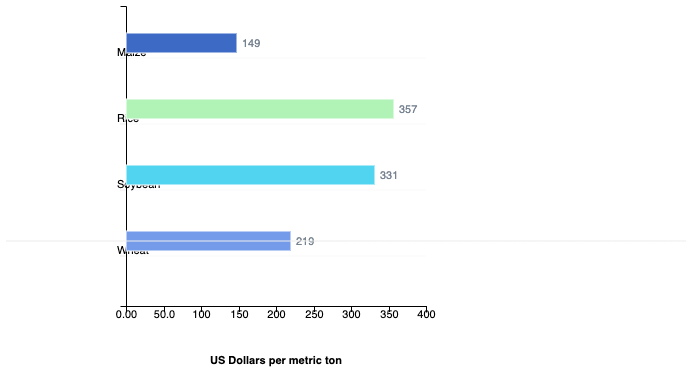

In [150]:
sqlOld = """
    SELECT round((sum(value))::numeric,2) as val,avg(value) as val_avg, max_value, commodity, impactparameter, region, '2005 usd/Ton' as units 
    FROM (SELECT  max(value) over (partition by impactparameter) max_value, * 
          FROM combined01_prepared 
          WHERE scenario = 'SSP2-MIRO' and impactparameter = 'World price') r 
    {{where}} and commodity IN  ('Maize','Rice','Soybean','Wheat') 
    GROUP BY max_value, region, commodity, impactparameter 
    ORDER BY impactparameter asc, commodity asc 
    LIMIT 5
"""
confOld = json.loads("""
    {"sql_config": [
    {
        "key": "where",
        "key_params": [
            {
                "key": "year",
                "required": true
            }
        ]
    }
]
}
""")
sqlNew = """
    SELECT round((sum(value))::numeric,2) as val,avg(value) as val_avg, max_value, commodity, impactparameter, region, '2005 usd/Ton' as units
     FROM (SELECT  max(value) over (partition by impactparameter) max_value, * 
          FROM combined01_prepared_new 
          WHERE scenario = 'SSP2-MIRO' and impactparameter = 'World price') r 
    {{where}} and commodity IN  ('maize','rice','soybean','wheat') 
     GROUP BY max_value, region, commodity, impactparameter 
     ORDER BY impactparameter asc, commodity asc 
     LIMIT 5
"""
confNew = json.loads("""
    {"sql_config": [
    {
        "key": "where",
        "key_params": [
            {
                "key": "year",
                "required": true
            }
        ]
    }
]}
""")
displayAQfwinfo('World Price', '9391e42c-f32b-40d9-a282-3083e617464f', sqlOld, confOld, sqlNew, confNew)

#### Average global change in seasonal variability for rainfed crops through 2040

**Widget ID**: [abf5c0f9-4042-4ea6-9582-1b34209cb4ba](https://staging-api.globalforestwatch.org/v1/widget/abf5c0f9-4042-4ea6-9582-1b34209cb4ba)  

**Old query:**

>```sql 
     with f as (SELECT basinid, crop, irrigation, iso 
           FROM crops 
           WHERE irrigation='rainfed'), 
     g as (SELECT basinid, sv3028tr, sv2028tr, sv4028tr, svbs00tr 
           FROM aqueduct_projections_20150309  
           where  svbs00tr > -1), 
     a as (SELECT avg(sv3028tr) as sv2030, avg(sv2028tr) as sv2020, avg(sv4028tr) as sv2040, avg(svbs00tr) as sv2010, crop 
           FROM f,g 
           WHERE f.basinid=g.basinid 
           GROUP BY crop), 
     b as (SELECT sv2010, sv2020, sv2030, sv2040, crop, 
           CASE when crop IN ('barley','maize','millet','rice','sorghum','wheat','other cereals') then 'Cereal' 
                when crop IN ('beans', 'cowpeas', 'chickpeas', 'groundnut', 'lentils', 'pigeonpeas', 'other pulses') then 'Pulses and legumes' 
                when crop IN ('cassava','potato','sweet potato','yams') then 'Roots And Tubers' 
                when crop IN ('banana','plantain') then 'Fruit and nuts' 
                when crop IN ('soybean') then 'Oilseed crops' 
           END as type 
           FROM a t), 
     c as (SELECT avg(sv2010) as sv2010,avg(sv2020) as sv2020,avg(sv2030) as sv2030,avg(sv2040) as sv2040, type 
           FROM b 
           GROUP BY type), 
   rrr as (SELECT type as cat, unnest(array[ '2010', '2020', '2030', '2040']) AS year, 
                  unnest(array[ sv2010, sv2020, sv2030, sv2040]) AS water_risk 
           FROM c order by year, cat) 


   SELECT year, cat as impactparameter, water_risk as value 
   FROM rrr 
   WHERE cat IN ('Cereal', 'Pulses and legumes', 'Roots And Tubers', 'Fruit and nuts', 'Oilseed crops') 
   ORDER BY year, 
            CASE cat WHEN 'Cereal' THEN 1 
                     WHEN 'Pulses and legumes' THEN 2 
                     WHEN 'Roots And Tubers' THEN 3 
                     WHEN 'Fruit and nuts' THEN 4 
            ELSE 5 
            END
 ``` 

>```JSON
    {}``` 

,year,impactparameter,value
0,2010,Cereal,0.911941
1,2010,Pulses and legumes,1.084655
2,2010,Roots And Tubers,0.911385
3,2010,Fruit and nuts,0.902324
4,2010,Oilseed crops,0.797071
5,2020,Cereal,0.922994
6,2020,Pulses and legumes,1.102238
7,2020,Roots And Tubers,0.921384
8,2020,Fruit and nuts,0.919233
9,2020,Oilseed crops,0.812412


**New query:**

>```sql 
     with alpha as (SELECT crop, year, value
               FROM crops_risk_rankings 
               WHERE indicator='seasonal_variability' and irrigation='rainfed' 
               ORDER BY year asc), 
     betha as (SELECT value, year,
                      CASE when crop IN ('barley','maize','small millet', 'pearl millet','rice','sorghum','wheat','other cereals') then 'Cereals' 
                           when crop IN ('bean', 'cowpea', 'chickpea', 'pigeonpea', 'lentil', 'other pulses') then 'Pulses and legumes' 
                           when crop IN ('cassava','potato','sweet potato','yams', 'other roots') then 'Roots and tubers' 
                           when crop IN ('banana','plantain', 'tropical fruit', 'temperate fruit') then 'Fruit and nuts' 
                           when crop IN ('soybean', 'groundnut', 'coconut', 'oilpalm', 'sunflower', 'rapeseed', 'sesameseed', 'other oil crops') then 'Oilseed crops'  
                           when crop IN ('sugarcane', 'sugarbeet') then 'Sugar crops' 
                           when crop IN ('cotton', 'other fibre crops') then 'Fibres'  
                           when crop IN ('arabica coffee', 'robusta coffee', 'cocoa', 'tea', 'tobacco') then 'Stimulants'  
                           when crop IN ('vegetables') then 'Vegetables' 
                           when crop IN ('rest of crops') then 'Other crops' 
                      END as grupo 
               FROM alpha 
               ORDER BY year asc, grupo)

SELECT avg(value) as water_risk, year, grupo as cat 
FROM betha 
WHERE grupo is not null 
GROUP BY grupo, year 
ORDER BY year, cat
 ``` 

>```JSON 
    {
  "sql_config": [
    {
      "key": "where",
      "key_params": [
        {
          "key": "year",
          "required": true
        }
      ]
    }
  ]
} ``` 

,water_risk,year,cat
0,1.893130,2014,Cereals
1,2.095604,2014,Fibres
2,1.729593,2014,Fruit and nuts
3,1.825166,2014,Oilseed crops
4,1.806151,2014,Other crops
5,1.960893,2014,Pulses and legumes
6,1.719248,2014,Roots and tubers
7,1.643627,2014,Stimulants
8,1.600214,2014,Sugar crops
9,1.667647,2014,Vegetables


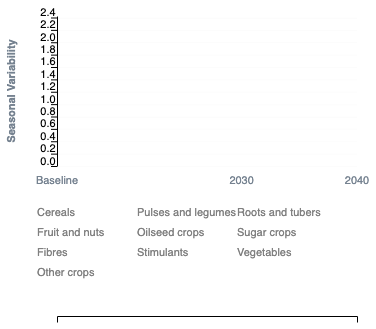

In [153]:
sqlOld = """ with f as (SELECT basinid, crop, irrigation, iso 
           FROM crops 
           WHERE irrigation='rainfed'), 
     g as (SELECT basinid, sv3028tr, sv2028tr, sv4028tr, svbs00tr 
           FROM aqueduct_projections_20150309  
           where  svbs00tr > -1), 
     a as (SELECT avg(sv3028tr) as sv2030, avg(sv2028tr) as sv2020, avg(sv4028tr) as sv2040, avg(svbs00tr) as sv2010, crop 
           FROM f,g 
           WHERE f.basinid=g.basinid 
           GROUP BY crop), 
     b as (SELECT sv2010, sv2020, sv2030, sv2040, crop, 
           CASE when crop IN ('barley','maize','millet','rice','sorghum','wheat','other cereals') then 'Cereal' 
                when crop IN ('beans', 'cowpeas', 'chickpeas', 'groundnut', 'lentils', 'pigeonpeas', 'other pulses') then 'Pulses and legumes' 
                when crop IN ('cassava','potato','sweet potato','yams') then 'Roots And Tubers' 
                when crop IN ('banana','plantain') then 'Fruit and nuts' 
                when crop IN ('soybean') then 'Oilseed crops' 
           END as type 
           FROM a t), 
     c as (SELECT avg(sv2010) as sv2010,avg(sv2020) as sv2020,avg(sv2030) as sv2030,avg(sv2040) as sv2040, type 
           FROM b 
           GROUP BY type), 
   rrr as (SELECT type as cat, unnest(array[ '2010', '2020', '2030', '2040']) AS year, 
                  unnest(array[ sv2010, sv2020, sv2030, sv2040]) AS water_risk 
           FROM c order by year, cat) 


   SELECT year, cat as impactparameter, water_risk as value 
   FROM rrr 
   WHERE cat IN ('Cereal', 'Pulses and legumes', 'Roots And Tubers', 'Fruit and nuts', 'Oilseed crops') 
   ORDER BY year, 
            CASE cat WHEN 'Cereal' THEN 1 
                     WHEN 'Pulses and legumes' THEN 2 
                     WHEN 'Roots And Tubers' THEN 3 
                     WHEN 'Fruit and nuts' THEN 4 
            ELSE 5 
            END
"""
confOld = json.loads("""
    {
}
""")
sqlNew = """ with alpha as (SELECT crop, year, value
               FROM crops_risk_rankings 
               WHERE indicator='seasonal_variability' and irrigation='rainfed' 
               ORDER BY year asc), 
     betha as (SELECT value, year,
                      CASE when crop IN ('barley','maize','small millet', 'pearl millet','rice','sorghum','wheat','other cereals') then 'Cereals' 
                           when crop IN ('bean', 'cowpea', 'chickpea', 'pigeonpea', 'lentil', 'other pulses') then 'Pulses and legumes' 
                           when crop IN ('cassava','potato','sweet potato','yams', 'other roots') then 'Roots and tubers' 
                           when crop IN ('banana','plantain', 'tropical fruit', 'temperate fruit') then 'Fruit and nuts' 
                           when crop IN ('soybean', 'groundnut', 'coconut', 'oilpalm', 'sunflower', 'rapeseed', 'sesameseed', 'other oil crops') then 'Oilseed crops'  
                           when crop IN ('sugarcane', 'sugarbeet') then 'Sugar crops' 
                           when crop IN ('cotton', 'other fibre crops') then 'Fibres'  
                           when crop IN ('arabica coffee', 'robusta coffee', 'cocoa', 'tea', 'tobacco') then 'Stimulants'  
                           when crop IN ('vegetables') then 'Vegetables' 
                           when crop IN ('rest of crops') then 'Other crops' 
                      END as grupo 
               FROM alpha 
               ORDER BY year asc, grupo)

SELECT avg(value) as water_risk, year, grupo as cat 
FROM betha 
WHERE grupo is not null 
GROUP BY grupo, year 
ORDER BY year, cat
"""
confNew = json.loads("""
    {"sql_config": [
    {
        "key": "where",
        "key_params": [
            {
                "key": "year",
                "required": true
            }
        ]
    }
]}
""")
displayAQfwinfo('Average global change in seasonal variability for rainfed crops through 2040', 'abf5c0f9-4042-4ea6-9582-1b34209cb4ba', sqlOld, confOld, sqlNew, confNew)

For this widget we have created an intermediate table called `crops_risk_rankings`:
```sql
with bws as (SELECT r.crop, r.irrigation, r.area, r.prod, r.iso, r.name_cntr as region, 'water_stress' as indicator, 2014 as year,
                    coalesce(bws_score, -9999) as  value, coalesce(bws_cat, -9999) as  cat
             FROM water_risk_indicators_annual_all s
             LEFT JOIN crops_baseline r on s.aq30_id=r.aq30_id
             WHERE s.pfaf_id != -9999 and s.gid_1 != '-9999' and  bws_score != -9999 and  bws_cat != -9999),
bws_rank as (SELECT sum(value*area)/sum(area) as value, round(sum(cat*area)/sum(area)) as cat, crop, irrigation, iso, region, indicator, year
             FROM bws
             GROUP BY crop, irrigation, iso, region, indicator, year),
bws_label as(SELECT value, crop, irrigation, iso, region, indicator, year,
                    CASE when cat = 0 then 'low stress'
                         when cat = 1 then 'low-medium stress'
                         when cat = 2 then 'medium-high stress'
                         when cat = 3 then 'high stress'
                         when cat = 4 then 'extremely high stress'
                         when cat = 5 then 'arid and low water use'
                    END as label
             FROM bws_rank),
     bsv as (SELECT r.crop, r.irrigation, r.area, r.prod, r.iso, r.name_cntr as region, 'seasonal_variability' as indicator, 2014 as year,
                    coalesce(sev_score, -9999) as  value, coalesce(sev_cat, -9999) as  cat
		     FROM water_risk_indicators_annual_all s
		     LEFT JOIN crops_baseline r on s.aq30_id=r.aq30_id
		     WHERE s.pfaf_id != -9999 and s.gid_1 != '-9999' and  sev_score != -9999 and  sev_cat != -9999),                                                         
bsv_rank as (SELECT sum(value*area)/sum(area) as value, round(sum(cat*area)/sum(area)) as cat, crop, irrigation, iso, region, indicator, year
             FROM bsv
             GROUP BY crop, irrigation, iso, region, indicator, year),
bsv_label as(SELECT value, crop, irrigation, iso, region, indicator, year,
                    CASE when cat = 0 then 'low stress'
                         when cat = 1 then 'low-medium stress'
                         when cat = 2 then 'medium-high stress'
                         when cat = 3 then 'high stress'
                         when cat = 4 then 'extremely high stress'
                    END as label
             FROM bsv_rank),                                                               
     drr as (SELECT r.crop, r.irrigation, r.area, r.prod, r.iso, r.name_cntr as region, 'drought_risk' as indicator, 2014 as year,
                    coalesce(drr_score, -9999) as  value, coalesce(drr_cat, -9999) as  cat 
		     FROM water_risk_indicators_annual_all s
		     LEFT JOIN crops_baseline r on s.aq30_id=r.aq30_id
		     WHERE s.pfaf_id != -9999 and s.gid_1 != '-9999' and drr_score != -9999 and drr_cat != -9999),
drr_rank as (SELECT sum(value*area)/sum(area) as value, round(sum(cat*area)/sum(area)) as cat, crop, irrigation, iso, region, indicator, year
             FROM drr
             GROUP BY crop, irrigation, iso, region, indicator, year),
drr_label as(SELECT value, crop, irrigation, iso, region, indicator, year,
                    CASE when cat = 0 then 'low stress'
                         when cat = 1 then 'low-medium stress'
                         when cat = 2 then 'medium stress'
                         when cat = 3 then 'medium-high stress'
                         when cat = 4 then 'high stress'
                    END as label
             FROM drr_rank),                                                              
     pws as (SELECT r.crop, r.irrigation, r.area, r.prod, r.iso, r.name_cntr as region, indicator, year, label, 
                    CASE when label IN ('Low (<10%)') then 0 
                         when label IN ('Low-medium (10-20%)') then 1 
                         when label IN ('Medium-high (20-40%)') then 2 
                         when label IN ('High (40-80%)') then 3 
                         when label IN ('Extremely high (>80%)') then 4  
                         when label IN ('Arid and low water use') then 5 
                         when label IN ('No data') then -9999 
             END as value
             FROM water_risk_indicators_projections s
             LEFT JOIN crops_projected r on s.basinid=r.basinid
             WHERE type = 'future_value' and indicator = 'water_stress' and scenario = 'business_as_usual' and label != 'No data'),
pws_rank as (SELECT sum(value*area)/sum(area) as value, round(sum(value*area)/sum(area)) as cat, crop, irrigation, iso, region, indicator, year
             FROM pws
             GROUP BY crop, irrigation, iso, region, indicator, year),
pws_label as(SELECT value, crop, irrigation, iso, region, indicator, year,
                    CASE when cat = 0 then 'low stress'
                         when cat = 1 then 'low-medium stress'
                         when cat = 2 then 'medium-high stress'
                         when cat = 3 then 'high stress'
                         when cat = 4 then 'extremely high stress'
                    END as label
             FROM pws_rank),                                                               
     psv as (SELECT r.crop, r.irrigation, r.area, r.prod, r.iso, r.name_cntr as region, indicator, year, label, 
                    CASE when label IN ('Low (<0.33)') then 0 
                         when label IN ('Low-medium (0.33-0.66)') then 1 
                         when label IN ('Medium-high (0.66-1.0)') then 2 
                         when label IN ('High (1.0-1.33)') then 3 
                         when label IN ('Extremely High (>1.33)') then 4  
                         when label IN ('No data') then -9999 
             END as value
             FROM water_risk_indicators_projections s
             LEFT JOIN crops_projected r on s.basinid=r.basinid
             WHERE type = 'future_value' and indicator = 'seasonal_variability' and scenario = 'business_as_usual' and label != 'No data'),
psv_rank as (SELECT sum(value*area)/sum(area) as value, round(sum(value*area)/sum(area)) as cat, crop, irrigation, iso, region, indicator, year
             FROM psv
             GROUP BY crop, irrigation, iso, region, indicator, year),
psv_label as(SELECT value, crop, irrigation, iso, region, indicator, year,
                    CASE when cat = 0 then 'low stress'
                         when cat = 1 then 'low-medium stress'
                         when cat = 2 then 'medium-high stress'
                         when cat = 3 then 'high stress'
                         when cat = 4 then 'extremely high stress'
                    END as label
             FROM psv_rank)                                                                
             
SELECT *  FROM bws_label
UNION ALL
SELECT *  FROM bsv_label  
UNION ALL
SELECT *  FROM drr_label    
UNION ALL
SELECT *  FROM pws_label
UNION ALL
SELECT *  FROM psv_label  
```

In [142]:
payload = {'q': "SELECT * FROM crops_risk_rankings"}
r = requests.get('https://wri-rw.carto.com/api/v2/sql', params=payload)
print(r)
df = pd.read_json(json.dumps(r.json()['rows']), orient='records')
df.head()

<Response [200]>


,cartodb_id,the_geom,the_geom_webmercator,value,crop,irrigation,iso,region,indicator,year,label
0,1,NaN,NaN,0.454741,arabica coffee,irrigated,BDI,Burundi,water_stress,2014,low stress
1,2,NaN,NaN,0.626783,arabica coffee,irrigated,BRA,Brazil,water_stress,2014,low stress
2,3,NaN,NaN,0.119578,arabica coffee,irrigated,COL,Colombia,water_stress,2014,low stress
3,4,NaN,NaN,1.123613,arabica coffee,irrigated,CRI,Costa Rica,water_stress,2014,low-medium stress
4,5,NaN,NaN,0.506026,arabica coffee,irrigated,ECU,Ecuador,water_stress,2014,low stress


#### World Price

**Widget ID**: [9391e42c-f32b-40d9-a282-3083e617464f](https://staging-api.globalforestwatch.org/v1/widget/9391e42c-f32b-40d9-a282-3083e617464f)  

**Old query:**

>```sql 
    SELECT round((sum(value))::numeric,2) as val,avg(value) as val_avg, max_value, commodity, impactparameter, region, '2005 usd/Ton' as units 
    FROM (SELECT  max(value) over (partition by impactparameter) max_value, * 
          FROM combined01_prepared 
          WHERE scenario = 'SSP2-MIRO' and impactparameter = 'World price') r 
    {{where}} and commodity IN  ('Maize','Rice','Soybean','Wheat') 
    GROUP BY max_value, region, commodity, impactparameter 
    ORDER BY impactparameter asc, commodity asc 
    LIMIT 5
 ``` 

>```JSON
    {
  "sql_config": [
    {
      "key": "where",
      "key_params": [
        {
          "key": "year",
          "required": true
        }
      ]
    }
  ]
}``` 

,val,val_avg,max_value,commodity,impactparameter,region,units
0,148.66,148.657593,2296.737549,Maize,World price,-,2005 usd/Ton
1,357.08,357.076416,2296.737549,Rice,World price,-,2005 usd/Ton
2,331.40,331.399841,2296.737549,Soybean,World price,-,2005 usd/Ton
3,219.44,219.442307,2296.737549,Wheat,World price,-,2005 usd/Ton


**New query:**

>```sql 
    SELECT round((sum(value))::numeric,2) as val,avg(value) as val_avg, max_value, commodity, impactparameter, region, '2005 usd/Ton' as units
     FROM (SELECT  max(value) over (partition by impactparameter) max_value, * 
          FROM combined01_prepared_new 
          WHERE scenario = 'SSP2-MIRO' and impactparameter = 'World price') r 
    {{where}} and commodity IN  ('maize','rice','soybean','wheat') 
     GROUP BY max_value, region, commodity, impactparameter 
     ORDER BY impactparameter asc, commodity asc 
     LIMIT 5
 ``` 

>```JSON 
    {
  "sql_config": [
    {
      "key": "where",
      "key_params": [
        {
          "key": "year",
          "required": true
        }
      ]
    }
  ]
} ``` 

,val,val_avg,max_value,commodity,impactparameter,region,units
0,148.66,148.657593,2296.737549,maize,World price,-,2005 usd/Ton
1,357.08,357.076416,2296.737549,rice,World price,-,2005 usd/Ton
2,331.40,331.399841,2296.737549,soybean,World price,-,2005 usd/Ton
3,219.44,219.442307,2296.737549,wheat,World price,-,2005 usd/Ton


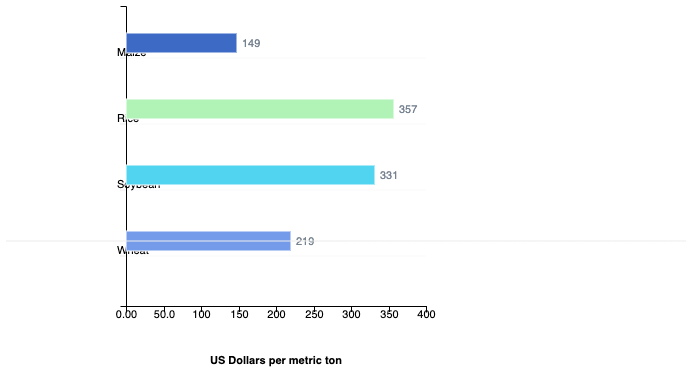

In [141]:
sqlOld = """
with t as (SELECT sum(area) as area, {{water_column}} as risk, crop 
           FROM crops_stats 
           WHERE irrigation='irrigated' 
           GROUP BY {{water_column}}, crop 
           ORDER BY risk asc), 
     r as (SELECT sum(value) as value, commodity 
           FROM combined01_prepared 
           WHERE  commodity in ('Maize','Rice','Soybean','Wheat') and scenario = 'SSP2-MIRO' and region='World' and year='{{year}}' 
                  and impactparameter='Food Demand'  
           GROUP BY commodity), 
     d as (SELECT value, commodity 
           FROM r ) 

SELECT crop, risk,value, (area*100/sum(area) over(partition by crop)) area_perc 
FROM d 
INNER JOIN t on lower(commodity)=crop 
ORDER BY risk asc, crop asc
"""
confOld = json.loads("""
    {"params_config": [
    {
        "required": true,
        "sufix": "l",
        "key": "water_column"
    },
    {
        "required": true,
        "key": "year"
    },
    {
        "required": true,
        "key": "iso"
    }
]
}
""")
sqlNew = """
    with t as (SELECT sum(area) as area, initcap(split_part(risk, ' (', 1)) as risk, crop 
           FROM crops_risk_stats
           WHERE indicator='water_stress' and irrigation='irrigated' and crop in ('maize','rice','soybean','wheat') and year = {{year}}
           GROUP BY risk, crop), 
     r as (SELECT sum(value) as value, commodity 
           FROM combined01_prepared 
           WHERE  commodity in ('Maize','Rice','Soybean','Wheat') and scenario = 'SSP2-MIRO' and region='World' and year = {{year}}
                  and impactparameter='Food Demand'  
           GROUP BY commodity), 
     d as (SELECT value, commodity 
           FROM r ) 

SELECT crop, value, (area*100/sum(area) over(partition by crop)) area_perc, 
       CASE when risk IN ('No Data') then '1.No Data'
            when risk IN ('Low') then '2.Low'
            when risk IN ('Low - Medium') then '3.Low-Mid'
            when risk IN ('Low-Medium') then '3.Low-Mid'                                            
            when risk IN ('Medium - High') then '4.Mid-High'
            when risk IN ('Medium-High') then '4.Mid-High'                                          
            when risk IN ('High') then '5.High'
            when risk IN ('Extremely High') then '6.Extremely High'
        END as risk
FROM d 
INNER JOIN t on lower(commodity)=crop 
ORDER BY risk asc, crop asc
"""
confNew = json.loads("""
    {"sql_config": [
    {
        "key": "where",
        "key_params": [
            {
                "key": "year",
                "required": true
            }
        ]
    }
]}
""")
displayAQfwinfo('Percent of crop area by level of water stress and volume of demand', '7b29a2a5-515a-4e22-846f-03ad3d2c0a13', sqlOld, confOld, sqlNew, confNew)

#### Percent of crop area by level of water stress and volume of demand
* **Widget_id:** [7b29a2a5-515a-4e22-846f-03ad3d2c0a13](https://staging-api.globalforestwatch.org/v1/widget/7b29a2a5-515a-4e22-846f-03ad3d2c0a13)

**Old query:**
    
`url: https://wri-rw.carto.com/api/v2/sql?q=`

`Sql:`
```sql
with t as (SELECT sum(area) as area, {{water_column}} as risk, crop 
           FROM crops_stats 
           WHERE irrigation='irrigated' 
           GROUP BY {{water_column}}, crop 
           ORDER BY risk asc), 
     r as (SELECT sum(value) as value, commodity 
           FROM combined01_prepared 
           WHERE  commodity in ('Maize','Rice','Soybean','Wheat') and scenario = 'SSP2-MIRO' and region='World' and year='{{year}}' 
                  and impactparameter='Food Demand'  
           GROUP BY commodity), 
     d as (SELECT value, commodity 
           FROM r ) 
           
SELECT crop, risk,value, (area*100/sum(area) over(partition by crop)) area_perc 
FROM d 
INNER JOIN t on lower(commodity)=crop 
ORDER BY risk asc, crop asc
```

`params_config:`
```json
"params_config": [
    {
        "required": true,
        "sufix": "l",
        "key": "water_column"
    },
    {
        "required": true,
        "key": "year"
    },
    {
        "required": true,
        "key": "iso"
    }
],
```

In [ ]:
payload = {'q': "with t as (select sum(area) as area, ws4028tl as risk, crop from crops_stats where irrigation='irrigated' group by ws4028tl, crop order by risk asc), r as (SELECT sum(value) as value, commodity FROM combined01_prepared WHERE  commodity in ('Maize','Rice','Soybean','Wheat') and scenario = 'SSP2-MIRO' and region='World' and year=2020 and impactparameter='Food Demand'  group by commodity ), d as ( select value, commodity from r ) select crop, risk,value, (area*100/sum(area) over(partition by crop)) area_perc from d inner join t on lower(commodity)=crop order by risk asc, crop asc"}
r = requests.get('https://wri-rw.carto.com/api/v2/sql', params=payload)
print(r)
df = pd.read_json(json.dumps(r.json()['rows']), orient='records')
df

**New query**

- Baseline:

```sql
with a as (SELECT crop, irrigation, iso, area, prod, coalesce(NULLIF(bws_label,''), 'No Data') as risk
           FROM crops_baseline a 
           LEFT JOIN water_risk_indicators_annual b ON b.aq30_id = a.aq30_id
           WHERE crop in ('maize','rice','soybean','wheat')),
     t as (SELECT sum(area) as area, risk, crop 
           FROM a 
           WHERE irrigation='irrigated' 
           GROUP BY risk, crop 
           ORDER BY risk asc), 
     r as (SELECT sum(value) as value, commodity 
           FROM combined01_prepared_new 
           WHERE  commodity in ('maize','rice','soybean','wheat') and scenario = 'SSP2-MIRO' and region='World' and year='{{year}}' 
                  and impactparameter='Food Demand'  
           GROUP BY commodity), 
     d as (SELECT value, commodity 
           FROM r ) 
           
SELECT crop, risk, value, (area*100/sum(area) over(partition by crop)) area_perc 
FROM d 
INNER JOIN t on lower(commodity)=crop 
ORDER BY risk asc, crop asc
```

- Projected:

```sql
with a as (SELECT crop, irrigation, iso, area, prod, label as risk
           FROM crops_projected a 
           LEFT JOIN water_risk_indicators_projections b ON b.basinid = a.basinid
           WHERE crop in ('maize','rice','soybean','wheat') and b.type = 'future_value' and indicator = 'water_stress' and year = 2020 and scenario = 'business_as_usual'),
     t as (SELECT sum(area) as area, risk, crop 
           FROM a 
           WHERE irrigation='irrigated' 
           GROUP BY risk, crop 
           ORDER BY risk asc), 
     r as (SELECT sum(value) as value, commodity 
           FROM combined01_prepared_new 
           WHERE  commodity in ('maize','rice','soybean','wheat') and scenario = 'SSP2-MIRO' and region='World' and year= 2020 
                  and impactparameter='Food Demand'  
           GROUP BY commodity), 
     d as (SELECT value, commodity 
           FROM r ) 
           
SELECT crop, risk,value, (area*100/sum(area) over(partition by crop)) area_perc 
FROM d 
INNER JOIN t on lower(commodity)=crop 
ORDER BY risk asc, crop asc
```

- Combined

First we create an intermediate table called `crops_risk_stats`:
```sql
with a_bws as (SELECT crop, irrigation, iso, name_cntr as country, area, prod, coalesce(NULLIF(bws_label,''), 'No Data') as risk, 'water_stress' as indicator, 
                      2010 as year
               FROM crops_baseline a 
               LEFT JOIN water_risk_indicators_annual b ON b.aq30_id = a.aq30_id),
     b_bws as (SELECT sum(area) as area, sum(prod) as prod, crop, irrigation, iso, country, risk, indicator, year 
               FROM a_bws 
               GROUP BY crop, irrigation, iso, country, risk, indicator, year 
               ORDER BY risk asc),
     a_bwd as (SELECT crop, irrigation, iso, name_cntr as country, area, prod, coalesce(NULLIF(bwd_label,''), 'No Data') as risk, 'water_depletion' as indicator, 
                      2010 as year
               FROM crops_baseline a 
               LEFT JOIN water_risk_indicators_annual b ON b.aq30_id = a.aq30_id),
     b_bwd as (SELECT sum(area) as area, sum(prod) as prod, crop, irrigation, iso, country, risk, indicator, year 
               FROM a_bwd 
               GROUP BY crop, irrigation, iso, country, risk, indicator, year 
               ORDER BY risk asc),
     a_gtd as (SELECT crop, irrigation, iso, name_cntr as country, area, prod, coalesce(NULLIF(gtd_label,''), 'No Data') as risk, 
                      'groundwater_table_decline' as indicator, 2010 as year
               FROM crops_baseline a 
               LEFT JOIN water_risk_indicators_annual b ON b.aq30_id = a.aq30_id),
     b_gtd as (SELECT sum(area) as area, sum(prod) as prod, crop, irrigation, iso, country, risk, indicator, year 
               FROM a_gtd 
               GROUP BY crop, irrigation, iso, country, risk, indicator, year 
               ORDER BY risk asc),
     a_iav as (SELECT crop, irrigation, iso, name_cntr as country, area, prod, coalesce(NULLIF(iav_label,''), 'No Data') as risk, 
                      'interannual_variability' as indicator, 2010 as year
               FROM crops_baseline a 
               LEFT JOIN water_risk_indicators_annual b ON b.aq30_id = a.aq30_id),
     b_iav as (SELECT sum(area) as area, sum(prod) as prod, crop, irrigation, iso, country, risk, indicator, year 
               FROM a_iav 
               GROUP BY crop, irrigation, iso, country, risk, indicator, year 
               ORDER BY risk asc),
     a_sev as (SELECT crop, irrigation, iso, name_cntr as country, area, prod, coalesce(NULLIF(sev_label,''), 'No Data') as risk, 
                      'seasonal_variability' as indicator, 2010 as year
               FROM crops_baseline a 
               LEFT JOIN water_risk_indicators_annual b ON b.aq30_id = a.aq30_id),
     b_sev as (SELECT sum(area) as area, sum(prod) as prod, crop, irrigation, iso, country, risk, indicator, year 
               FROM a_sev 
               GROUP BY crop, irrigation, iso, country, risk, indicator, year 
               ORDER BY risk asc),
     a_drr as (SELECT crop, irrigation, iso, name_cntr as country, area, prod, coalesce(NULLIF(drr_label,''), 'No Data') as risk, 
                      'drought_risk' as indicator, 2010 as year
               FROM crops_baseline a 
               LEFT JOIN water_risk_indicators_annual b ON b.aq30_id = a.aq30_id),
     b_drr as (SELECT sum(area) as area, sum(prod) as prod, crop, irrigation, iso, country, risk, indicator, year 
               FROM a_drr
               GROUP BY crop, irrigation, iso, country, risk, indicator, year 
               ORDER BY risk asc),
     a_rfr as (SELECT crop, irrigation, iso, name_cntr as country, area, prod, coalesce(NULLIF(rfr_label,''), 'No Data') as risk, 
                      'riverine_flood_risk' as indicator, 2010 as year
               FROM crops_baseline a 
               LEFT JOIN water_risk_indicators_annual b ON b.aq30_id = a.aq30_id),
     b_rfr as (SELECT sum(area) as area, sum(prod) as prod, crop, irrigation, iso, country, risk, indicator, year 
               FROM a_rfr
               GROUP BY crop, irrigation, iso, country, risk, indicator, year 
               ORDER BY risk asc),
     a_cfr as (SELECT crop, irrigation, iso, name_cntr as country, area, prod, coalesce(NULLIF(cfr_label,''), 'No Data') as risk, 
                      'coastal_flood_risk' as indicator, 2010 as year
               FROM crops_baseline a 
               LEFT JOIN water_risk_indicators_annual b ON b.aq30_id = a.aq30_id),
     b_cfr as (SELECT sum(area) as area, sum(prod) as prod, crop, irrigation, iso, country, risk, indicator, year 
               FROM a_cfr
               GROUP BY crop, irrigation, iso, country, risk, indicator, year 
               ORDER BY risk asc),
     a_ucw as (SELECT crop, irrigation, iso, name_cntr as country, area, prod, coalesce(NULLIF(ucw_label,''), 'No Data') as risk, 
                      'untreated_collected_wastewater' as indicator, 2010 as year
               FROM crops_baseline a 
               LEFT JOIN water_risk_indicators_annual b ON b.aq30_id = a.aq30_id),
     b_ucw as (SELECT sum(area) as area, sum(prod) as prod, crop, irrigation, iso, country, risk, indicator, year 
               FROM a_ucw
               GROUP BY crop, irrigation, iso, country, risk, indicator, year 
               ORDER BY risk asc),
     a_cep as (SELECT crop, irrigation, iso, name_cntr as country, area, prod, coalesce(NULLIF(cep_label,''), 'No Data') as risk, 
                      'coastal_eutrophication_potential' as indicator, 2010 as year
               FROM crops_baseline a 
               LEFT JOIN water_risk_indicators_annual b ON b.aq30_id = a.aq30_id),
     b_cep as (SELECT sum(area) as area, sum(prod) as prod, crop, irrigation, iso, country, risk, indicator, year 
               FROM a_cep
               GROUP BY crop, irrigation, iso, country, risk, indicator, year 
               ORDER BY risk asc),
     a_udw as (SELECT crop, irrigation, iso, name_cntr as country, area, prod, coalesce(NULLIF(udw_label,''), 'No Data') as risk, 
                      'unimproved_drinking_water' as indicator, 2010 as year
               FROM crops_baseline a 
               LEFT JOIN water_risk_indicators_annual b ON b.aq30_id = a.aq30_id),
     b_udw as (SELECT sum(area) as area, sum(prod) as prod, crop, irrigation, iso, country, risk, indicator, year 
               FROM a_udw
               GROUP BY crop, irrigation, iso, country, risk, indicator, year 
               ORDER BY risk asc),
     a_usa as (SELECT crop, irrigation, iso, name_cntr as country, area, prod, coalesce(NULLIF(usa_label,''), 'No Data') as risk, 
                      'unimproved_sanitation' as indicator, 2010 as year
               FROM crops_baseline a 
               LEFT JOIN water_risk_indicators_annual b ON b.aq30_id = a.aq30_id),
     b_usa as (SELECT sum(area) as area, sum(prod) as prod, crop, irrigation, iso, country, risk, indicator, year 
               FROM a_usa
               GROUP BY crop, irrigation, iso, country, risk, indicator, year 
               ORDER BY risk asc),
     a_rri as (SELECT crop, irrigation, iso, name_cntr as country, area, prod, coalesce(NULLIF(rri_label,''), 'No Data') as risk, 
                      'reprisk_index' as indicator, 2010 as year
               FROM crops_baseline a 
               LEFT JOIN water_risk_indicators_annual b ON b.aq30_id = a.aq30_id),
     b_rri as (SELECT sum(area) as area, sum(prod) as prod, crop, irrigation, iso, country, risk, indicator, year 
               FROM a_rri
               GROUP BY crop, irrigation, iso, country, risk, indicator, year 
               ORDER BY risk asc),
         c_ws as (SELECT crop, irrigation, iso, name_cntr as country, area, prod, label as risk, indicator, year
               FROM crops_projected a 
               LEFT JOIN water_risk_indicators_projections b ON b.basinid = a.basinid
               WHERE b.type = 'future_value' and indicator = 'water_stress' and scenario = 'business_as_usual'),
         d_ws as (SELECT sum(area) as area, sum(prod) as prod, crop, irrigation, iso, country, risk, indicator, year 
               FROM c_ws
               GROUP BY risk, crop, irrigation, iso, country, risk, indicator, year 
               ORDER BY risk asc),
         c_sv as (SELECT crop, irrigation, iso, name_cntr as country, area, prod, label as risk, indicator, year
               FROM crops_projected a 
               LEFT JOIN water_risk_indicators_projections b ON b.basinid = a.basinid
               WHERE b.type = 'future_value' and indicator = 'seasonal_variability' and scenario = 'business_as_usual'),
         d_sv as (SELECT sum(area) as area, sum(prod) as prod, crop, irrigation, iso, country, risk, indicator, year 
               FROM c_sv
               GROUP BY risk, crop, irrigation, iso, country, risk, indicator, year 
               ORDER BY risk asc)

SELECT *  FROM b_bws 
UNION ALL
SELECT *  FROM b_bwd 
UNION ALL
SELECT *  FROM b_gtd 
UNION ALL
SELECT *  FROM b_iav 
UNION ALL
SELECT *  FROM b_sev 
UNION ALL
SELECT *  FROM b_drr 
UNION ALL
SELECT *  FROM b_rfr 
UNION ALL
SELECT *  FROM b_cfr 
UNION ALL
SELECT *  FROM b_ucw 
UNION ALL
SELECT *  FROM b_cep 
UNION ALL
SELECT *  FROM b_udw 
UNION ALL
SELECT *  FROM b_usa 
UNION ALL
SELECT *  FROM b_rri 
UNION ALL
SELECT *  FROM d_ws
UNION ALL
SELECT *  FROM d_sv
```

In [ ]:
payload = {'q': "SELECT * FROM crops_risk_stats"}
r = requests.get('https://wri-rw.carto.com/api/v2/sql', params=payload)
print(r)
df = pd.read_json(json.dumps(r.json()['rows']), orient='records')
df.head()

`url: https://wri-rw.carto.com/api/v2/sql?q=`

`Sql:`
```sql
with t as (SELECT sum(area) as area, initcap(split_part(risk, ' (', 1)) as risk, crop 
           FROM crops_risk_stats
           WHERE indicator='water_stress' and irrigation='irrigated' and crop in ('maize','rice','soybean','wheat') and year = {{year}}
           GROUP BY risk, crop), 
     r as (SELECT sum(value) as value, commodity 
           FROM combined01_prepared 
           WHERE  commodity in ('Maize','Rice','Soybean','Wheat') and scenario = 'SSP2-MIRO' and region='World' and year = {{year}}
                  and impactparameter='Food Demand'  
           GROUP BY commodity), 
     d as (SELECT value, commodity 
           FROM r ) 
           
SELECT crop, value, (area*100/sum(area) over(partition by crop)) area_perc, 
       CASE when risk IN ('No Data') then '1.No Data'
			when risk IN ('Low') then '2.Low'
			when risk IN ('Low - Medium') then '3.Low-Mid'
			when risk IN ('Low-Medium') then '3.Low-Mid'                                            
			when risk IN ('Medium - High') then '4.Mid-High'
			when risk IN ('Medium-High') then '4.Mid-High'                                          
			when risk IN ('High') then '5.High'
			when risk IN ('Extremely High') then '6.Extremely High'
        END as risk
FROM d 
INNER JOIN t on lower(commodity)=crop 
ORDER BY risk asc, crop asc                                                  
```

`params_config:`
```json
"params_config": [
    {
        "required": true,
        "key": "year"
    }
],
```

In [ ]:
payload = {'q': "with t as (SELECT sum(area) as area, initcap(split_part(risk, ' (', 1)) as risk, crop FROM crops_risk_stats WHERE indicator='water_stress' and irrigation='irrigated' and crop in ('maize','rice','soybean','wheat') and year = 2010 GROUP BY risk, crop), r as (SELECT sum(value) as value, commodity FROM combined01_prepared WHERE  commodity in ('Maize','Rice','Soybean','Wheat') and scenario = 'SSP2-MIRO' and region='World' and year = 2010 and impactparameter='Food Demand' GROUP BY commodity), d as (SELECT value, commodity FROM r ) SELECT crop, value, (area*100/sum(area) over(partition by crop)) area_perc, CASE when risk IN ('No Data') then '1.No Data' when risk IN ('Low') then '2.Low' when risk IN ('Low - Medium') then '3.Low-Mid' when risk IN ('Low-Medium') then '3.Low-Mid' when risk IN ('Medium - High') then '4.Mid-High' when risk IN ('Medium-High') then '4.Mid-High' when risk IN ('High') then '5.High' when risk IN ('Extremely High') then '6.Extremely High' END as risk FROM d INNER JOIN t on lower(commodity)=crop ORDER BY risk asc, crop asc "}
r = requests.get('https://wri-rw.carto.com/api/v2/sql', params=payload)
print(r)
df = pd.read_json(json.dumps(r.json()['rows']), orient='records')
df

In [ ]:
Vega = """
{
  "interaction_config": [
    {
      "config": {
        "fields": [
          {
            "label": "Crop",
            "key": "crop"
          },
          {
            "suffix": "",
            "format": ".2f",
            "label": "Crop percentage",
            "key": "value"
          },
          {
            "label": "Risk",
            "key": "risk"
          },
          {
            "suffix": "%",
            "format": ".2f",
            "label": "Risk percentage",
            "key": "area_perc"
          }
        ]
      },
      "name": "tooltip"
    }
  ],
  "params_config": [
    {
      "required": true,
      "sufix": "l",
      "key": "water_column"
    },
    {
      "required": true,
      "key": "year"
    },
    {
      "required": true,
      "key": "iso"
    }
  ],
  "sql_config": [],
  "titleConfig": {
    "baseline": "Percentage of crop area by level of water stress and volume of demand",
    "future": " Projected percentage of crop area by level of water stress and volume of demand in 2020"
  },
  "height": 300,
  "padding": "auto",
  "legends": [
    {
      "fill": "color",
      "properties": {
        "legend": {
          "x": {
            "field": {
              "group": "width"
            },
            "mult": -0.2
          },
          "y": {
            "field": {
              "group": "height"
            },
            "mult": 1.2
          }
        },
        "labels": {
          "fill": {
            "value": "#9BA2AA"
          },
          "baseline": {
            "value": "middle"
          },
          "text": {
            "template": "{{datum.data}}"
          },
          "x": {
            "scale": "legendx",
            "offset": 10
          },
          "y": {
            "scale": "legendy"
          }
        },
        "symbols": {
          "stroke": {
            "value": "rgba(255,255,255,0)"
          },
          "shape": {
            "value": "square"
          },
          "size": [
            {
              "value": 100
            }
          ],
          "x": {
            "scale": "legendx"
          },
          "y": {
            "scale": "legendy"
          }
        }
      }
    }
  ],
  "scales": [
    {
      "domain": {
        "fields": [
          {
            "field": "t_e",
            "data": "stats_risk"
          }
        ]
      },
      "range": "width",
      "type": "linear",
      "name": "x"
    },
    {
      "domain": {
        "fields": [
          {
            "field": "crop",
            "data": "legend_crop"
          }
        ]
      },
      "range": "width",
      "type": "linear",
      "name": "xl"
    },
    {
      "points": false,
      "domain": {
        "fields": [
          {
            "field": "t_m",
            "data": "legend_crop"
          }
        ]
      },
      "range": {
        "fields": [
          {
            "field": "crop",
            "data": "legend_crop"
          }
        ]
      },
      "type": "ordinal",
      "name": "x_label"
    },
    {
      "domain": {
        "fields": [
          {
            "field": "val_e",
            "data": "stats_risk"
          }
        ]
      },
      "range": "height",
      "type": "linear",
      "name": "y"
    },
   {
      "name": "color",
      "type": "ordinal",
      "range": [
        "#4E4E4E",
        "#FFFF99",
        "#FFE600",
        "#FF9900",
        "#FF1900",
        "#990000",
         "#dcdcdc"
      ],
      "domain": {
        "data": "legend",
        "field": "label_risk"
      }
    },
    {
      "name": "legendx",
      "type": "ordinal",
      "domain": {
        "data": "legend",
        "field": "label_risk"
      },
      "range": {
        "data": "legend",
        "field": "pos_x"
      }
    },
    {
      "name": "legendy",
      "type": "ordinal",
      "domain": {
        "data": "legend",
        "field": "label_risk"
      },
      "range": [
        0,
        0,
        0,
        20,
        20,
        20,
        40
        ]
    }
  ],
  "marks": [
    
    {
      "properties": {
        "enter": {
          "stroke_width": {
            "value": 1
          },
          "stroke": {
            "value": "#eee"
          },
          "fill":{
              "scale": "color",
              "field": "risk",
              "test": "datum.risk"
            },
          "y2": {
            "scale": "y",
            "field": "val_e"
          },
          "x2": {
            "scale": "x",
            "field": "t_e"
          },
          "y": {
            "scale": "y",
            "field": "val_s"
          },
          "x": {
            "scale": "x",
            "field": "t_s"
          }
        }
      },
      "type": "rect",
      "name": "columns",
      "from": {
        "data": "stats_risk"
      }
    },
    {"interactive": false,
      "type": "group",
      "from": {
        "data": "crop_pos",
        "transform": [
          {
            "type": "facet",
            "groupby": [
              "a.crop"
            ]
          }
        ]
      },
      "marks": [
        {
      "properties": {
        "update": {
          "font_size": {
            "value": 12
          },
          "angle": {
            "value": 0
          },
          "align": {
            "value": "center"
          },
          "text": {
            "template": "{{datum.a.crop | slice:0,1 |upper}}{{datum.a.crop | slice:1,100, datum.a.crop}}"
          },
          "fill": {
            "value": "#758290"
          },
          "y": {
            "offset": 30,
            "value": 0,
            "scale": "y"
          },
          "x": {
            "offset": 0,
            "scale": "x",
            "field": "position"
          }
        }
      },
      "type": "text",
      "name": "label"
    },
        {
          "type": "rule",
          "properties": {
            "update": {
              "x": {
                "offset": 0,
                "scale": "x",
                "field": "a.t_m"
              },
              "x2": {
                "offset": 0,
                "scale": "x",
                "field": "a.t_m"
              },
              "y2": {
                "scale": "y",
                "value": 0
                
              },
              "y": {
                "scale": "y",
                "value": -5
              },
              "stroke": {
                "value": "#CCCCCC"
              },
              "strokeWidth": {
                "value": 1
              }
            }
          }
        },
        {
          "type": "rule",
          "properties": {
            "update": {
              "x": {
                "offset": 0,
                "scale": "x",
                "field": "position"
              },
              "x2": {
                "field": "a.t_m",
                "offset": 0,
                "scale": "x"
              },
              "y2": {
                "scale": "y",
                "value": -5,
                "offset":0
                
              },
              "y": {
                "scale": "y",
                "value": -5,
                "offset":0
              },
              "stroke": {
                "value": "#CCCCCC"
              },
              "strokeWidth": {
                "value": 1
              }
            }
          }
        },
        {
          "type": "rule",
          "properties": {
            "update": {
              "x": {
                "offset": 0,
                "scale": "x",
                "field": "position"
              },
              "x2": {
                "offset": 0,
                "scale": "x",
                "field": "position"
              },
              "y2": {
                "scale": "y",
                "value": -5
                
              },
              "y": {
                "scale": "y",
                "value": -7
              },
              "stroke": {
                "value": "#CCCCCC"
              },
              "strokeWidth": {
                "value": 1
              }
            }
          }
        }
      ]
    }
  ],
  "data": [
    {
      "format": {
        "property": "rows",
        "type": "json"
      },
      "name": "hist",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=with t as (SELECT sum(area) as area, initcap(split_part(risk, ' (', 1)) as risk, crop FROM crops_risk_stats WHERE indicator='water_stress' and irrigation='irrigated' and crop in ('maize','rice','soybean','wheat') and year = 2010 GROUP BY risk, crop), r as (SELECT sum(value) as value, commodity FROM combined01_prepared WHERE  commodity in ('Maize','Rice','Soybean','Wheat') and scenario = 'SSP2-MIRO' and region='World' and year = 2010 and impactparameter='Food Demand' GROUP BY commodity), d as (SELECT value, commodity FROM r ) SELECT crop, value, (area*100/sum(area) over(partition by crop)) area_perc, CASE when risk IN ('No Data') then '1.No Data' when risk IN ('Low') then '2.Low' when risk IN ('Low - Medium', 'Low-Medium') then '3.Low-Mid' when risk IN ('Medium - High', 'Medium-High') then '4.Mid-High' when risk IN ('High') then '5.High' when risk IN ('Extremely High') then '6.Extremely High' END as risk FROM d INNER JOIN t on lower(commodity)=crop ORDER BY risk asc, crop asc"
    },
    {
      "transform": [
        {
          "groupby": [
            "crop"
          ],
          "output": {
            "start": "val_s",
            "mid": "val_m",
            "end": "val_e"
          },
          "offset": "zero",
          "field": "area_perc",
          "type": "stack"
        },
        {
          "groupby": [
            "risk"
          ],
          "output": {
            "start": "t_s",
            "mid": "t_m",
            "end": "t_e"
          },
          "offset": "zero",
          "field": "value",
          "type": "stack"
        }
      ],
      "source": "hist",
      "name": "stats_risk"
    },
    {
      "transform": [
        {
          "summarize": [
            {
              "field": "t_e",
              "ops": [
                "max"
              ],
              "as": [
                "t_e"
              ]
            }
          ],
          "type": "aggregate"
        }
      ],
      "source": "stats_risk",
      "name": "range"
    },
    {
      "transform": [
        {
          "summarize": [
            {
              "field": "t_m",
              "ops": [
                "max"
              ],
              "as": [
                "t_m"
              ]
            },
            {
              "field": "t_e",
              "ops": [
                "max"
              ],
              "as": [
                "t_e"
              ]
            }
          ],
          "groupby": [
            "crop"
          ],
          "type": "aggregate"
        },
        {
          "type": "sort",
          "by": "t_m"
        },
        {
          "type": "rank",
          "field": "crop"
        }
      ],
      "source": "stats_risk",
      "name": "legend_crop"
    },
    {
      "source": "legend_crop",
      "name": "crop_pos",
      "transform": [
        {
          "type": "cross",
          "with": "range",
          "diagonal": false
        },
        {
          "type": "formula",
          "field": "position",
          "expr": "(datum.b.t_e/5)*datum.a.rank"
        }
      ]
    },
    {"name": "legend_data",
     "values": [
       {"index":1 ,"label":"1.No Data"},
       {"index":2 ,"label":"2.Low"},
       {"index":3 ,"label":"3.Low-Mid"},
       {"index":4 ,"label":"4.Mid-High"},
       {"index":5 ,"label":"5.High"},
       {"index":6 ,"label":"6.Extremely High"},
       {"index":7 ,"label":"Arid & Low Water Use"}
     ],
     "transform": [ {
          "by": "index",
          "type": "sort"
        },
        {
          "expr": "length(datum.label)",
          "field": "size",
          "type": "formula"
        }]
    },
    {
      "name": "legend_sum",
      "source": "legend_data",
      "transform": [
        {
          "summarize":[ 
          {"field": "size", "ops": ["max"], "as": ["max"]},
          {"field": "label", "ops": ["count"], "as": ["count"]}
          ],
          
          "type": "aggregate"
        }
      ]
    },
    {
      "name": "legend",
      "source": "legend_data",
      "transform": [
        {
          "output": {
            "right": "count",
            "left": "label"
          },
          "with": "legend_sum",
          "diagonal": false,
          "type": "cross"
        },
        {
          "expr": "datum.label.label",
          "field": "label_risk",
          "type": "formula"
        },
        {
          "expr": "ceil(datum.count.count/4)",
          "field": "x_abs",
          "type": "formula"
        },
        {
          "expr": "(datum.label.index-1)%3",
          "field": "posx",
          "type": "formula"
        },
        {
          "expr": "(ceil(datum.label.index/3))-1",
          "field": "posy",
          "type": "formula"
        },
        {
          "expr": "datum.posy*20",
          "field": "pos_y",
          "type": "formula"
        },
        {
          "expr": "datum.posx*datum.count.max*7",
          "field": "pos_x",
          "type": "formula"
        }
      ]
    }
  ],
  "axes": [
    {
      "properties": {
        "labels": {
          "baseline": {
            "value": "middle"
          },
          "align": {
            "value": "center"
          }
        },
        "title": {
          "dy": {
            "value": -38
          }
        },
        "axis": {
          "stroke": {
            "value": "transparent"
          }
        }
      },
      "orient": "top",
      "title": "Demand (thousand metric tons)",
      "ticks": 7,
      "scale": "x",
      "type": "x",
      "format": "s",
      "grid": false
    },
    {
      "properties": {
        "labels": {
          "baseline": {
            "value": "middle"
          },
          "align": {
            "value": "right"
          },
          "text": {
            "template": "{{datum.data}}%"
          },
          "x": {
            "offset": -10
          }
        },
        "title": {
          "dy": {
            "value": -52
          }
        }
      },
      "title": "% crop area under water stress",
      "ticks": 6,
      "scale": "y",
      "type": "y",
      "grid": true
    }
  ],
  "width": 300
}

"""

#### Average global change in water stress for irrigated crops through 2040
* **Widget_id:** [4f322f4a-dde6-4f63-b7c9-10b0ba0c1402](https://staging-api.globalforestwatch.org/v1/widget/4f322f4a-dde6-4f63-b7c9-10b0ba0c1402)

**Old query:**
    
`url: https://wri-rw.carto.com/api/v2/sql?q=`

`Sql:`
```sql
with alpha as (SELECT crop, year, value
               FROM crops_risk_rankings 
               WHERE indicator='water_stress' and irrigation='irrigated' 
               ORDER BY year asc), 
     betha as (SELECT value, year,
                      CASE when crop IN ('barley','maize','small millet', 'pearl millet','rice','sorghum','wheat','other cereals') then 'Cereals' 
                           when crop IN ('bean', 'cowpea', 'chickpea', 'pigeonpea', 'lentil', 'other pulses') then 'Pulses and legumes' 
                           when crop IN ('cassava','potato','sweet potato','yams', 'other roots') then 'Roots and tubers' 
                           when crop IN ('banana','plantain', 'tropical fruit', 'temperate fruit') then 'Fruit and nuts' 
                           when crop IN ('soybean', 'groundnut', 'coconut', 'oilpalm', 'sunflower', 'rapeseed', 'sesameseed', 'other oil crops') then 'Oilseed crops'  
                           when crop IN ('sugarcane', 'sugarbeet') then 'Sugar crops' 
                           when crop IN ('cotton', 'other fibre crops') then 'Fibres'  
                           when crop IN ('arabica coffee', 'robusta coffee', 'cocoa', 'tea', 'tobacco') then 'Stimulants'  
                           when crop IN ('vegetables') then 'Vegetables' 
                           when crop IN ('rest of crops') then 'Other crops' 
                      END as grupo 
               FROM alpha 
               ORDER BY year asc, grupo)

SELECT avg(value) as water_risk, year, grupo as cat 
FROM betha 
WHERE grupo is not null and year in (2014, 2030, 2040)
GROUP BY grupo, year 
ORDER BY year, 
CASE grupo WHEN 'Cereals' THEN 1 
                             WHEN 'Pulses and legumes' THEN 2 
                             WHEN 'Roots and tubers' THEN 3 
                             WHEN 'Fruit and nuts' THEN 4 
                             WHEN 'Oilseed crops' THEN 5
                             WHEN 'Sugar crops' THEN 6 
                             WHEN 'Fibres' THEN 7
                             WHEN 'Stimulants' THEN 8
                             WHEN 'Vegetables' THEN 9
                             WHEN 'Other crops' THEN 10
                             ELSE 11 END
```

In [ ]:
payload = {'q': "with alpha as (SELECT crop, year, value FROM crops_risk_rankings WHERE indicator='water_stress' and irrigation='irrigated' ORDER BY year asc), betha as (SELECT value, year, CASE when crop IN ('barley','maize','small millet', 'pearl millet','rice','sorghum','wheat','other cereals') then 'Cereals' when crop IN ('bean', 'cowpea', 'chickpea', 'pigeonpea', 'lentil', 'other pulses') then 'Pulses and legumes' when crop IN ('cassava','potato','sweet potato','yams', 'other roots') then 'Roots and tubers' when crop IN ('banana','plantain', 'tropical fruit', 'temperate fruit') then 'Fruit and nuts' when crop IN ('soybean', 'groundnut', 'coconut', 'oilpalm', 'sunflower', 'rapeseed', 'sesameseed', 'other oil crops') then 'Oilseed crops'  when crop IN ('sugarcane', 'sugarbeet') then 'Sugar crops' when crop IN ('cotton', 'other fibre crops') then 'Fibres'  when crop IN ('arabica coffee', 'robusta coffee', 'cocoa', 'tea', 'tobacco') then 'Stimulants'  when crop IN ('vegetables') then 'Vegetables' when crop IN ('rest of crops') then 'Other crops' END as grupo FROM alpha ORDER BY year asc, grupo) SELECT avg(value) as water_risk, year, grupo as cat FROM betha WHERE grupo is not null and year in (2014, 2030, 2040) GROUP BY grupo, year ORDER BY year, CASE grupo WHEN 'Cereals' THEN 1 WHEN 'Pulses and legumes' THEN 2 WHEN 'Roots and tubers' THEN 3 WHEN 'Fruit and nuts' THEN 4 WHEN 'Oilseed crops' THEN 5 WHEN 'Sugar crops' THEN 6 WHEN 'Fibres' THEN 7 WHEN 'Stimulants' THEN 8 WHEN 'Vegetables' THEN 9 WHEN 'Other crops' THEN 10 ELSE 11 END"}
r = requests.get('https://wri-rw.carto.com/api/v2/sql', params=payload)
print(r)
df = pd.read_json(json.dumps(r.json()['rows']), orient='records')
df

**New query**

`url: https://wri-rw.carto.com/api/v2/sql?q=`

`Sql:`
```sql
with alpha as (SELECT crop, year, value
               FROM crops_risk_rankings 
               WHERE indicator='water_stress' and irrigation='irrigated' 
               ORDER BY year asc), 
     betha as (SELECT value, year,
                      CASE when crop IN ('barley','maize','small millet', 'pearl millet','rice','sorghum','wheat','other cereals') then 'Cereals' 
                           when crop IN ('bean', 'cowpea', 'chickpea', 'pigeonpea', 'lentil', 'other pulses') then 'Pulses and legumes' 
                           when crop IN ('cassava','potato','sweet potato','yams', 'other roots') then 'Roots and tubers' 
                           when crop IN ('banana','plantain', 'tropical fruit', 'temperate fruit') then 'Fruit and nuts' 
                           when crop IN ('soybean', 'groundnut', 'coconut', 'oilpalm', 'sunflower', 'rapeseed', 'sesameseed', 'other oil crops') then 'Oilseed crops'  
                           when crop IN ('sugarcane', 'sugarbeet') then 'Sugar crops' 
                           when crop IN ('cotton', 'other fibre crops') then 'Fibres'  
                           when crop IN ('arabica coffee', 'robusta coffee', 'cocoa', 'tea', 'tobacco') then 'Stimulants'  
                           when crop IN ('vegetables') then 'Vegetables' 
                           when crop IN ('rest of crops') then 'Other crops' 
                      END as grupo 
               FROM alpha 
               ORDER BY year asc, grupo)
               
SELECT avg(value) as water_risk, year, grupo as cat 
FROM betha 
WHERE grupo is not null 
GROUP BY grupo, year 
ORDER BY year, cat
```

In [ ]:
payload = {'q': "with alpha as (SELECT crop, year, value FROM crops_risk_rankings WHERE indicator='water_stress' and irrigation='irrigated' ORDER BY year asc), betha as (SELECT value, year, CASE when crop IN ('barley','maize','small millet', 'pearl millet','rice','sorghum','wheat','other cereals') then 'Cereals' when crop IN ('bean', 'cowpea', 'chickpea', 'pigeonpea', 'lentil', 'other pulses') then 'Pulses and legumes' when crop IN ('cassava','potato','sweet potato','yams', 'other roots') then 'Roots and tubers' when crop IN ('banana','plantain', 'tropical fruit', 'temperate fruit') then 'Fruit and nuts' when crop IN ('soybean', 'groundnut', 'coconut', 'oilpalm', 'sunflower', 'rapeseed', 'sesameseed', 'other oil crops') then 'Oilseed crops'  when crop IN ('sugarcane', 'sugarbeet') then 'Sugar crops' when crop IN ('cotton', 'other fibre crops') then 'Fibres'  when crop IN ('arabica coffee', 'robusta coffee', 'cocoa', 'tea', 'tobacco') then 'Stimulants'  when crop IN ('vegetables') then 'Vegetables' when crop IN ('rest of crops') then 'Other crops' END as grupo FROM alpha ORDER BY year asc, grupo) SELECT avg(value) as water_risk, year, grupo as cat FROM betha WHERE grupo is not null GROUP BY grupo, year ORDER BY year, cat"}
r = requests.get('https://wri-rw.carto.com/api/v2/sql', params=payload)
print(r)
df = pd.read_json(json.dumps(r.json()['rows']), orient='records')
df

#### Irrigated vs Rainfed

* **Widget_id**: [606c813b-d716-4b0b-8717-9389425c9262](https://staging-api.globalforestwatch.org/v1/widget/606c813b-d716-4b0b-8717-9389425c9262)

**Old query:**

`url: https://wri-01.carto.com/api/v2/sql?=`

`Sql:`
```sql
SELECT sum(value) as value, irrigation as category 
FROM combined01_prepared_new 
WHERE impactparameter='Area' and scenario='SSP2-MIRO' {{and}} and commodity<>'all cereals' and commodity<>'all pulses' and region <> 'World' 
GROUP BY irrigation
```
`sql_config:`
```json
"sql_config": [
    {
        "key_params": [
            {
                "required": true,
                "key": "year"
            },
            {
                "required": false,
                "key": "iso"
            },
            {
                "required": false,
                "key": "commodity"
            }
        ],
        "key": "and"
    }
```

In [ ]:
payload = {'q': "SELECT sum(value) as value, irrigation as category FROM combined01_prepared_new where impactparameter='Area' and scenario='SSP2-MIRO' AND year = 2010 and commodity<>'all cereals' and commodity<>'all pulses' and region <> 'World' group by irrigation"}
r = requests.get('https://wri-01.carto.com/api/v2/sql', params=payload)
print(r)
df = pd.read_json(json.dumps(r.json()['rows']), orient='records')
df

**New query:**

`url: https://wri-rw.carto.com/api/v2/sql?=`

`Sql:`
```sql
SELECT sum(area) as value, irrigation as category
FROM crops_risk_stats
WHERE indicator = 'water_stress' {{and}} 
GROUP BY irrigation 
```
`sql_config:`
```json
"sql_config": [
    {
        "key_params": [
            {
                "required": true,
                "key": "year"
            },
            {
                "required": false,
                "key": "iso"
            },
            {
                "required": false,
                "key": "crop"
            }
        ],
        "key": "and"
    }
```

In [ ]:
payload = {'q': "SELECT sum(area) as value, irrigation as category FROM crops_risk_stats WHERE indicator = 'water_stress' and year = 2010 GROUP BY irrigation"}
r = requests.get('https://wri-rw.carto.com/api/v2/sql', params=payload)
print(r)
df = pd.read_json(json.dumps(r.json()['rows']), orient='records')
df

#### Percentage of crop production area by water risk in year
* **Widget_id:** [7b37bd6e-a465-4c4d-98b3-1a110a66d27e](https://staging-api.globalforestwatch.org/v1/widget/7b37bd6e-a465-4c4d-98b3-1a110a66d27e)

**Old query:**

`url: https://wri-rw.carto.com/api/v2/sql?=`

`Sql:`
```sql
with ff as (select *, case when {{year}}=2010  then  2010 else year  end as y  
            from water_risk_indicators 
            where (year={{year}} or year = 2014)),  
     wr as (SELECT basinid, indicator, label, value 
            FROM ff 
            where type='absolute' and period='year' and y={{year}} and indicator in ('seasonal_variability', 'drought_severity', 'water_stress','groundwater_stress', 'interannual_variability') and label is not null 
                  and label !='' and label !='-32767'), 
   prod as (SELECT sum(value) as value 
            FROM combined01_prepared 
            where year={{year}} and  commodity<>'All Cereals' and commodity<>'All Pulses' and impactparameter='Production' and scenario = 'SSP2-MIRO' 
            order by value desc),   
      s as (SELECT sum(area) as perc, min(basin_total_area) b_area, basinid, irrigation 
            FROM all_crops_stats 
            group by basinid, irrigation), 
      f as (select  wr.basinid, indicator, label, perc, b_area, irrigation,sum(perc) over (partition by indicator) as sdss, value  
            from s 
            inner join wr on wr.basinid=s.basinid), 
      t as (select sum(perc)*100/sdss a, label, indicator, irrigation, max(value) as value_m  
            from f 
            group by label, indicator, irrigation, sdss 
            order by indicator asc, label asc ) 
            
 select initcap(split_part(label, ' (', 1)) as risk, row_number() over (partition by indicator order by value_m asc) as index, replace(initcap(indicator), '_', ' ') as indicator, irrigation, prod.value*a as perc_value, value_m, a as area_perc 
from t, prod  
where (indicator='water_stress' and irrigation='irrigated') or (indicator='drought_severity' and irrigation='rainfed') or (indicator='seasonal_variability' and irrigation='rainfed') or (indicator='interannual_variability' and irrigation='irrigated') or (indicator='groundwater_stress' and irrigation='irrigated')
```

`sql_config:`
```json
"sql_config": [
    {
        "key_params": [
            {
                "required": true,
                "key": "year"
            }
        ],
        "key": "where"
    }
],
```

`params_config:`
```json
"params_config": [
    {
        "key": "year",
        "required": true
    },
    {
        "required": true,
        "key": "commodity"
    },
    {
        "required": true,
        "key": "crop"
    }
],
```

In [ ]:
payload = {'q': "with ff as (select *, case when 2010=2010  then  2010 else year  end as y from water_risk_indicators where (year=2010 or year = 2014)), wr as (SELECT basinid, indicator, label, value FROM ff where type='absolute' and period='year' and y=2010 and indicator in ('seasonal_variability', 'drought_severity', 'water_stress','groundwater_stress', 'interannual_variability') and label is not null and label !='' and label !='-32767'), prod as (SELECT sum(value) as value FROM combined01_prepared where year=2010 and  commodity<>'All Cereals' and commodity<>'All Pulses' and impactparameter='Production' and scenario = 'SSP2-MIRO' order by value desc), s as (SELECT sum(area) as perc, min(basin_total_area) b_area, basinid, irrigation FROM all_crops_stats group by basinid, irrigation), f as (select  wr.basinid, indicator, label, perc, b_area, irrigation,sum(perc) over (partition by indicator) as sdss, value  from s inner join wr on wr.basinid=s.basinid), t as (select sum(perc)*100/sdss a, label, indicator, irrigation, max(value) as value_m  from f group by label, indicator, irrigation, sdss order by indicator asc, label asc ) select initcap(split_part(label, ' (', 1)) as risk, row_number() over (partition by indicator order by value_m asc) as index, replace(initcap(indicator), '_', ' ') as indicator, irrigation, prod.value*a as perc_value, value_m, a as area_perc from t, prod  where (indicator='water_stress' and irrigation='irrigated') or (indicator='drought_severity' and irrigation='rainfed') or (indicator='seasonal_variability' and irrigation='rainfed') or (indicator='interannual_variability' and irrigation='irrigated') or (indicator='groundwater_stress' and irrigation='irrigated')"}
r = requests.get('https://wri-01.carto.com/api/v2/sql', params=payload)
print(r)
df = pd.read_json(json.dumps(r.json()['rows']), orient='records')
df

**New query:**

`url: https://wri-rw.carto.com/api/v2/sql?=`

`Sql:`
```sql
with a as (SELECT sum(area) as area_perc, indicator, irrigation, sum(prod) as perc_value, risk
           FROM crops_risk_stats
           WHERE year={{year}} 
           GROUP BY indicator, irrigation, risk
           ORDER BY indicator, indicator, risk),
     b as (SELECT initcap(split_part(risk, ' (', 1)) as risk, replace(initcap(indicator), '_', ' ') as indicator, area_perc, perc_value, irrigation
           FROM a
           WHERE (indicator='water_stress' and irrigation='irrigated') or (indicator='seasonal_variability' and irrigation='rainfed') or 
                 (indicator='interannual_variability' and irrigation='irrigated') or (indicator='water_depletion' and irrigation='irrigated') or 
                 (indicator='riverine_flood_risk' and irrigation='irrigated') or (indicator='coastal_flood_risk' and irrigation='irrigated') or 
                 (indicator='coastal_eutrophication_potential' and irrigation='irrigated') or (indicator='unimproved_drinking_water' and irrigation='irrigated') or 
                 (indicator='unimproved_sanitation' and irrigation='irrigated') or (indicator='reprisk_index' and irrigation='irrigated')),

     c as (SELECT indicator, area_perc, perc_value, irrigation,  
                  CASE when risk IN ('No Data') then '1.No Data'
                       when risk IN ('Low') then '2.Low'
                       when risk IN ('Low - Medium') then '3.Low-Mid'
                       when risk IN ('Low-Medium') then '3.Low-Mid'
                       when risk IN ('Medium - High') then '4.Mid-High'
                       when risk IN ('Medium-High') then '4.Mid-High'
                       when risk IN ('High') then '5. High'
                       when risk IN ('Extremely High') then '6.Extremely High'
                       when risk IN ('Arid And Low Water Use') then 'Arid and Low Water Use'
                  END as risk,
                  CASE when risk IN ('No Data') then -9999
                       when risk IN ('Low') then 0
                       when risk IN ('Low - Medium') then 1
                       when risk IN ('Low-Medium') then 1
                       when risk IN ('Medium - High') then 2
                       when risk IN ('Medium-High') then 2
                       when risk IN ('High') then 3
                       when risk IN ('Extremely High') then 4
                       when risk IN ('Arid And Low Water Use') then 5
                  END as value_m

           FROM b)

SELECT indicator, area_perc, perc_value, irrigation, risk, value_m, row_number() over (partition by indicator order by value_m asc) as index 
FROM c
```


`sql_config:`
```json
"sql_config": [
    {
        "key_params": [
            {
                "required": true,
                "key": "year"
            }
        ],
        "key": "where"
    }
],
```

`params_config:`
```json
"params_config": [
    {
        "key": "year",
        "required": true
    }
],
```

In [ ]:
payload = {'q': "with a as (SELECT sum(area) as area_perc, indicator, irrigation, sum(prod) as perc_value, risk FROM crops_risk_stats WHERE year=2030 GROUP BY indicator, irrigation, risk ORDER BY indicator, indicator, risk), b as (SELECT initcap(split_part(risk, ' (', 1)) as risk, replace(initcap(indicator), '_', ' ') as indicator, area_perc, perc_value, irrigation FROM a WHERE (indicator='water_stress' and irrigation='irrigated') or (indicator='seasonal_variability' and irrigation='rainfed') or (indicator='interannual_variability' and irrigation='irrigated') or (indicator='water_depletion' and irrigation='irrigated') or (indicator='riverine_flood_risk' and irrigation='irrigated') or (indicator='coastal_flood_risk' and irrigation='irrigated') or (indicator='coastal_eutrophication_potential' and irrigation='irrigated') or (indicator='unimproved_drinking_water' and irrigation='irrigated') or (indicator='unimproved_sanitation' and irrigation='irrigated') or (indicator='reprisk_index' and irrigation='irrigated')), c as (SELECT indicator, area_perc, perc_value, irrigation, CASE when risk IN ('No Data') then '1.No Data' when risk IN ('Low') then '2.Low' when risk IN ('Low - Medium') then '3.Low-Mid' when risk IN ('Low-Medium') then '3.Low-Mid' when risk IN ('Medium - High') then '4.Mid-High' when risk IN ('Medium-High') then '4.Mid-High' when risk IN ('High') then '5. High' when risk IN ('Extremely High') then '6.Extremely High' when risk IN ('Arid And Low Water Use') then 'Arid and Low Water Use' END as risk, CASE when risk IN ('No Data') then -9999 when risk IN ('Low') then 0 when risk IN ('Low - Medium') then 1 when risk IN ('Low-Medium') then 1 when risk IN ('Medium - High') then 2 when risk IN ('Medium-High') then 2 when risk IN ('High') then 3 when risk IN ('Extremely High') then 4 when risk IN ('Arid And Low Water Use') then 5 END as value_m FROM b) SELECT indicator, area_perc, perc_value, irrigation, risk, value_m, row_number() over (partition by indicator order by value_m asc) as index FROM c"}
r = requests.get('https://wri-rw.carto.com/api/v2/sql', params=payload)
print(r)
df = pd.read_json(json.dumps(r.json()['rows']), orient='records')
df

***
### COUNTRY
#### Percent of crop area by level of water stress and volume of demand in country
* **Widget_id:** [e2778762-4b3d-498c-8b4a-869ac834f406](https://staging-api.globalforestwatch.org/v1/widget/e2778762-4b3d-498c-8b4a-869ac834f406) 

**Old query:**

`url: https://wri-rw.carto.com/api/v2/sql?=`

`Sql:`
```sql
with ss  as (SELECT * 
             FROM crops_countries_stats where iso = '{{iso}}'), 
      sd as (SELECT ss.*, wsbs00tl as risk 
             FROM ss inner join crops_stats on ss.basinid=crops_stats.basinid and ss.crop=crops_stats.crop), 
       t as (select sum(area) as area, risk, crop 
             from sd 
             group by  risk, crop 
             order by risk asc), 
       r as (SELECT sum(value) as value, commodity 
             FROM combined01_prepared 
             WHERE commodity<>'All Cereals' and commodity<>'All Pulses' and iso='{{iso}}' and year='{{year}}' and impactparameter='Food Demand' and scenario='SSP2-MIRO' group by commodity), 
       d as (select value, commodity 
             from r ) 
             
select crop, risk, value, ((area*100)/sum(area) over(partition by crop)) area_perc 
from d 
inner join t on lower(commodity)=crop 
order by risk asc, crop asc
``` 

`params_config:`
```json
                "params_config": [
                    {
                        "required": true,
                        "key": "year"
                    },
                    {
                        "required": true,
                        "key": "iso"
                    },
                    {
                        "required": true,
                        "key": "countryName"
                    },
                    {
                        "required": true,
                        "key": "crop_name"
                    }
                ],
```

**New query**
`url: https://wri-rw.carto.com/api/v2/sql?q=`

`Sql:`
```sql                                           
with t as (SELECT sum(area) as area, initcap(split_part(risk, ' (', 1)) as risk, crop 
           FROM crops_risk_stats
           WHERE indicator='water_stress' and irrigation='irrigated' and crop in ('maize','rice','soybean','wheat') and year = {{year}} and iso = '{{iso}}'
           GROUP BY risk, crop), 
     r as (SELECT sum(value) as value, commodity 
           FROM combined01_prepared 
           WHERE commodity<>'All Cereals' and commodity<>'All Pulses' and impactparameter='Food Demand' and scenario='SSP2-MIRO' and year = {{year}} and iso = '{{iso}}'
           GROUP BY commodity), 
     d as (SELECT value, commodity 
           FROM r ) 
           
SELECT crop, value, (area*100/sum(area) over(partition by crop)) area_perc, 
       CASE when risk IN ('No Data') then '1.No Data'
			when risk IN ('Low') then '2.Low'
			when risk IN ('Low - Medium') then '3.Low-Mid'
			when risk IN ('Low-Medium') then '3.Low-Mid'                                            
			when risk IN ('Medium - High') then '4.Mid-High'
			when risk IN ('Medium-High') then '4.Mid-High'                                          
			when risk IN ('High') then '5.High'
			when risk IN ('Extremely High') then '6.Extremely High'
        END as risk
FROM d 
INNER JOIN t on lower(commodity)=crop 
ORDER BY risk asc, crop asc                                              
```

`params_config:`
```json
                "params_config": [
                    {
                        "required": true,
                        "sufix": "l",
                        "key": "water_column"
                    },
                    {
                        "required": true,
                        "key": "year"
                    },
                    {
                        "required": true,
                        "key": "iso"
                    },
                    {
                        "required": true,
                        "key": "countryName"
                    },
                    {
                        "required": true,
                        "key": "crop_name"
                    }
                ],
```

In [ ]:
payload = {'q': "with t as (SELECT sum(area) as area, initcap(split_part(risk, ' (', 1)) as risk, crop FROM crops_risk_stats WHERE indicator='water_stress' and irrigation='irrigated' and crop in ('maize','rice','soybean','wheat') and year = 2010 and iso = 'ESP' GROUP BY risk, crop), r as (SELECT sum(value) as value, commodity FROM combined01_prepared WHERE commodity<>'All Cereals' and commodity<>'All Pulses' and impactparameter='Food Demand' and scenario='SSP2-MIRO' and year = 2010 and iso = 'ESP' GROUP BY commodity), d as (SELECT value, commodity FROM r) SELECT crop, value, (area*100/sum(area) over(partition by crop)) area_perc, CASE when risk IN ('No Data') then '1.No Data' when risk IN ('Low') then '2.Low' when risk IN ('Low - Medium') then '3.Low-Mid' when risk IN ('Low-Medium') then '3.Low-Mid' when risk IN ('Medium - High') then '4.Mid-High' when risk IN ('Medium-High') then '4.Mid-High' when risk IN ('High') then '5.High' when risk IN ('Extremely High') then '6.Extremely High' END as risk FROM d INNER JOIN t on lower(commodity)=crop ORDER BY risk asc, crop asc"}
r = requests.get('https://wri-rw.carto.com/api/v2/sql', params=payload)
print(r)
df = pd.read_json(json.dumps(r.json()['rows']), orient='records')
df

#### Percentage of crop production area by water risk in year in country
* **Widget_id:** [962fad79-ec09-4258-b233-d4934bfbbf61](https://staging-api.globalforestwatch.org/v1/widget/962fad79-ec09-4258-b233-d4934bfbbf61) 

**Old query**

`url: https://wri-rw.carto.com/api/v2/sql?=`

`Sql:`
```sql
with ff as (select *, case when {{year}}=2010  
                           then  2010 else year  
                      end as y  
            from water_risk_indicators 
            where (year={{year}} or year = 2014) and basinid in (SELECT basinid 
                                                                 FROM wri_subcatchements_v2 
                                                                 where iso='{{iso}}')),  
     wr as (SELECT basinid, indicator, label, value 
            FROM ff 
            where type='absolute' and period='year' and y={{year}} and indicator in ('seasonal_variability', 'drought_severity', 'water_stress','groundwater_stress', 'interannual_variability') and label is not null and label !='' and label !='-32767'), 
    prod as (SELECT sum(value) as value 
             FROM combined01_prepared 
             where iso='{{iso}}' and year={{year}} and  commodity<>'All Cereals' and commodity<>'All Pulses' and impactparameter='Production' and scenario = 'SSP2-MIRO' 
             order by value desc), 
       s as (SELECT sum(area) as perc, min(basin_total_area) b_area, basinid, irrigation 
             FROM all_crops_stats group by basinid, irrigation), 
       f as (select  wr.basinid, indicator, label, perc, b_area, irrigation,sum(perc) over (partition by indicator) as sdss, value  from s inner join wr on wr.basinid=s.basinid), 
       t as (select sum(perc)*100/sdss a, label, indicator, irrigation, max(value) as value_m  from f group by label, indicator, irrigation, sdss order by indicator asc, label asc ) select initcap(split_part(label, ' (', 1)) as risk, row_number() over (partition by indicator order by value_m asc) as index, replace(initcap(indicator), '_', ' ') as indicator, irrigation, prod.value*a as perc_value, value_m, a as area_perc from t, prod  where (indicator='water_stress' and irrigation='irrigated') or (indicator='drought_severity' and irrigation='rainfed') or (indicator='seasonal_variability' and irrigation='rainfed') or (indicator='interannual_variability' and irrigation='irrigated') or (indicator='groundwater_stress' and irrigation='irrigated')
```

`sql_config`
```json
                "sql_config": [
                    {
                        "key_params": [
                            {
                                "required": true,
                                "key": "year"
                            },
                            {
                                "required": true,
                                "key": "iso"
                            }
                        ],
                        "key": "where"
                    }
                ],
```

`params_config`
```json
                
                "params_config": [
                    {
                        "key": "year",
                        "required": true
                    },
                    {
                        "required": true,
                        "key": "iso"
                    },
                    {
                        "required": true,
                        "key": "countryName"
                    }
                ],
```

**New query:**

`url: https://wri-rw.carto.com/api/v2/sql?=`

`Sql:`
```sql
with a as (SELECT sum(area) as area_perc, indicator, irrigation, sum(prod) as perc_value, risk
           FROM crops_risk_stats
           WHERE year={{year}} and iso = '{{iso}}'
           GROUP BY indicator, irrigation, risk
           ORDER BY indicator, indicator, risk),
     b as (SELECT initcap(split_part(risk, ' (', 1)) as risk, replace(initcap(indicator), '_', ' ') as indicator, area_perc, perc_value, irrigation
           FROM a
           WHERE (indicator='water_stress' and irrigation='irrigated') or (indicator='seasonal_variability' and irrigation='rainfed') or 
                 (indicator='interannual_variability' and irrigation='irrigated') or (indicator='water_depletion' and irrigation='irrigated') or 
                 (indicator='riverine_flood_risk' and irrigation='irrigated') or (indicator='coastal_flood_risk' and irrigation='irrigated') or 
                 (indicator='coastal_eutrophication_potential' and irrigation='irrigated') or (indicator='unimproved_drinking_water' and irrigation='irrigated') or 
                 (indicator='unimproved_sanitation' and irrigation='irrigated') or (indicator='reprisk_index' and irrigation='irrigated')),

     c as (SELECT indicator, area_perc, perc_value, irrigation,  
                  CASE when risk IN ('No Data') then '1.No Data'
                       when risk IN ('Low') then '2.Low'
                       when risk IN ('Low - Medium') then '3.Low-Mid'
                       when risk IN ('Low-Medium') then '3.Low-Mid'
                       when risk IN ('Medium - High') then '4.Mid-High'
                       when risk IN ('Medium-High') then '4.Mid-High'
                       when risk IN ('High') then '5. High'
                       when risk IN ('Extremely High') then '6.Extremely High'
                       when risk IN ('Arid And Low Water Use') then 'Arid and Low Water Use'
                  END as risk,
                  CASE when risk IN ('No Data') then -9999
                       when risk IN ('Low') then 0
                       when risk IN ('Low - Medium') then 1
                       when risk IN ('Low-Medium') then 1
                       when risk IN ('Medium - High') then 2
                       when risk IN ('Medium-High') then 2
                       when risk IN ('High') then 3
                       when risk IN ('Extremely High') then 4
                       when risk IN ('Arid And Low Water Use') then 5
                  END as value_m

           FROM b)

SELECT indicator, area_perc, perc_value, irrigation, risk, value_m, row_number() over (partition by indicator order by value_m asc) as index 
FROM c
```

`params_config:`
```json
                
                "params_config": [
                    {
                        "key": "year",
                        "required": true
                    },
                    {
                        "required": true,
                        "key": "iso"
                    },
                    {
                        "required": true,
                        "key": "countryName"
                    }
                ],
```

In [ ]:
payload = {'q': "with a as (SELECT sum(area) as area_perc, indicator, irrigation, sum(prod) as perc_value, risk FROM crops_risk_stats WHERE year=2010  and iso = 'ESP' GROUP BY indicator, irrigation, risk ORDER BY indicator, indicator, risk), b as (SELECT initcap(split_part(risk, ' (', 1)) as risk, replace(initcap(indicator), '_', ' ') as indicator, area_perc, perc_value, irrigation FROM a WHERE (indicator='water_stress' and irrigation='irrigated') or (indicator='seasonal_variability' and irrigation='rainfed') or (indicator='interannual_variability' and irrigation='irrigated') or (indicator='water_depletion' and irrigation='irrigated') or (indicator='riverine_flood_risk' and irrigation='irrigated') or (indicator='coastal_flood_risk' and irrigation='irrigated') or (indicator='coastal_eutrophication_potential' and irrigation='irrigated') or (indicator='unimproved_drinking_water' and irrigation='irrigated') or (indicator='unimproved_sanitation' and irrigation='irrigated') or (indicator='reprisk_index' and irrigation='irrigated')), c as (SELECT indicator, area_perc, perc_value, irrigation, CASE when risk IN ('No Data') then '1.No Data' when risk IN ('Low') then '2.Low' when risk IN ('Low - Medium') then '3.Low-Mid' when risk IN ('Low-Medium') then '3.Low-Mid' when risk IN ('Medium - High') then '4.Mid-High' when risk IN ('Medium-High') then '4.Mid-High' when risk IN ('High') then '5. High' when risk IN ('Extremely High') then '6.Extremely High' when risk IN ('Arid And Low Water Use') then 'Arid and Low Water Use' END as risk, CASE when risk IN ('No Data') then -9999 when risk IN ('Low') then 0 when risk IN ('Low - Medium') then 1 when risk IN ('Low-Medium') then 1 when risk IN ('Medium - High') then 2 when risk IN ('Medium-High') then 2 when risk IN ('High') then 3 when risk IN ('Extremely High') then 4 when risk IN ('Arid And Low Water Use') then 5 END as value_m FROM b) SELECT indicator, area_perc, perc_value, irrigation, risk, value_m, row_number() over (partition by indicator order by value_m asc) as index FROM c"}
r = requests.get('https://wri-rw.carto.com/api/v2/sql', params=payload)
print(r)
df = pd.read_json(json.dumps(r.json()['rows']), orient='records')
df

***
***
## One crop (staging)
### GLOBAL 
#### Single growing crop under high water stress conditions
* **Widget_id:** [641970f9-84da-4560-a715-ad4f70a3b8f4](https://staging-api.globalforestwatch.org/v1/widget/641970f9-84da-4560-a715-ad4f70a3b8f4)

**Old query:**
    
`url: https://wri-rw.carto.com/api/v2/sql?q=`

`Sql:`

```sql
with a as (SELECT area, basinid, cell5m, crop 
           FROM crops 
           {{where}} and irrigation='irrigated'), 
     b as (SELECT basinid, ws2028tl, ws3028tl, ws4028tl, wsbs00tl 
           FROM all_crops_stats 
           {{where}} and irrigation='irrigated'), 
  agrr as (SELECT a.basinid, a.crop, b.ws2028tl, b.ws3028tl, b.ws4028tl, b.wsbs00tl, a.area as area_a 
           FROM a,b 
           WHERE a.basinid=b.basinid), 
y_2010 as (SELECT crop as commodity, sum(area_a) as area_a 
           FROM agrr 
           WHERE wsbs00tl IN ('4.Mid-High', '5.High', '6.Extremely high') 
           GROUP BY crop), 
y_2020 as (SELECT crop as commodity, sum(area_a) as area_a 
           FROM agrr 
           WHERE ws2028tl IN ('4.Mid-High', '5.High', '6.Extremely high') 
           GROUP BY crop), 
y_2030 as (SELECT crop as commodity, sum(area_a) as area_a 
           FROM agrr 
           WHERE ws3028tl IN ('4.Mid-High', '5.High', '6.Extremely high') 
           GROUP BY crop), 
y_2040 as (SELECT crop as commodity, sum(area_a) as area_a 
           FROM agrr 
           WHERE ws4028tl IN ('4.Mid-High', '5.High', '6.Extremely high') 
           GROUP BY crop), 
result as (SELECT commodity, area_a as value, 2010 as year 
           FROM y_2010 
           UNION ALL 
           SELECT commodity, area_a as value, 2020 as year 
           FROM y_2020 
           UNION ALL 
           SELECT commodity, area_a as value, 2030 as year 
           FROM y_2030 
           UNION ALL 
           SELECT commodity, area_a as value, 2040 as year 
           FROM y_2040), 
final_res as (SELECT year, commodity, value 
              FROM result 
              WHERE year={{year}}) 
              
SELECT case 
            when year > 2010 then 'will be' 
            else 'are' 
       end as verb, 
       case 
            when year > 2010 then 'in ' || to_char(year, '9999') 
            else '' 
       end as year, 
       commodity, value 
FROM final_res
```

`sql_config:`
```json
"sql_config": [
    {
        "key_params": [
            {
                "required": true,
                "key": "crop"
            }
        ],
        "key": "where"
}]
```

`params_config:`
```json
"params_config": [
    {
        "required": true,
        "key": "year"
    },
    {
        "required": true,
        "key": "commodity"
    }
]
```


**New query:**

`url: https://wri-rw.carto.com/api/v2/sql?q=`

`Sql:`

```sql
SELECT year::text, crop as commodity, sum(area) as value, 
	   CASE 
            WHEN year > 2010 then 'will be' 
            ELSE 'are' 
       END AS verb
FROM crops_risk_stats
WHERE crop = {{crop}} and irrigation = 'irrigated' and indicator = 'water_stress' and year = {{year}} and
      initcap(split_part(risk, ' (', 1)) IN ('Medium - High', 'Medium-High', 'High', 'Extremely High', 'Extremely High')
GROUP BY crop, year
```

`sql_config:`
```json
"sql_config": [
    {
        "key_params": [
            {
                "required": true,
                "key": "crop"
            }
        ],
        "key": "where"
}]
```

`params_config:`
```json
"params_config": [
    {
        "required": true,
        "key": "crop"
    },
    {
        "required": true,
        "key": "year"
    }
]
```

In [ ]:
payload = {'q': "SELECT year::text, crop as commodity, sum(area) as value, CASE WHEN year > 2010 then 'will be' ELSE 'are' END AS verb FROM crops_risk_stats WHERE crop = 'banana' and irrigation = 'irrigated' and indicator = 'water_stress' and year = 2010 and initcap(split_part(risk, ' (', 1)) IN ('Medium - High', 'Medium-High', 'High', 'Extremely High', 'Extremely High') GROUP BY crop, year"}
r = requests.get('https://wri-rw.carto.com/api/v2/sql', params=payload)
print(r)
df = pd.read_json(json.dumps(r.json()['rows']), orient='records')
df

#### Top 10 countries with the highest crop water stress scores in year
* **Widget_id:** [413a36b5-a7b4-4bb4-9491-98b5175b4e28](https://staging-api.globalforestwatch.org/v1/widget/413a36b5-a7b4-4bb4-9491-98b5175b4e28)

**Old query:**

`url: https://wri-rw.carto.com/api/v2/sql?q=`

`Sql:`

```sql
with alpha as (SELECT iso,name_iso as region, max(value) as value, 
                      CASE when crop='millet_small' then 'millet' 
                           when crop='millet_pearl' then 'millet' 
                           when crop='lentils' then 'lentils' 
                           when crop='wheat' then 'wheat' 
                           when crop='cowpeas' then 'cowpeas' 
                           when crop='barley' then 'barley' 
                           when crop='beans' then 'beans' 
                           when crop='potato' then 'potato' 
                           when crop='sorghum' then 'sorghum' 
                           when crop='pigeonpeas' then 'pigeonpeas' 
                           when crop='sweet potato' then 'sweet potato' 
                           when crop='soybean' then 'soybean' 
                           when crop='cassava' then 'cassava' 
                           when crop='rice' then 'rice' 
                           when crop='groundnut' then 'groundnut' 
                           when crop='chickpeas' then 'chickpeas' 
                           when crop='yams' then 'yams' 
                           when crop='plantain' then 'plantain' 
                           when crop='maize' then 'maize' 
                           when crop='banana' then 'banana' 
                           when crop='cassava' then 'cassava' 
                      end as crop, 
                      CASE when year=2014 then 2010 
                           when year=2020 then 2020 
                           when year=2030 then 2030 
                           when year=2040 then 2040 
                           else 2050 
                      END as year 
               FROM water_risk_rankings_v3 
               WHERE name_iso != '<Null>' and name_iso != ' ' and indicator= 'water_stress' and value is not null 
               GROUP BY iso, region, year, crop 
               ORDER BY year asc, value desc) 
SELECT * FROM alpha 
{{where}} and year={{year}} 
ORDER BY value 
DESC LIMIT 10
```

`sql_config:`
```json
                "sql_config": [
                    {
                        "key_params": [
                            {
                                "required": true,
                                "key": "crop"
                            }
                        ],
                        "key": "where"
                    }
                ],
```

`params_config:`
```json
                "params_config": [
                    {
                        "key": "crop",
                        "required": true
                    },
                    {
                        "key": "year",
                        "required": true
                    },
                    {
                        "key": "crop_name",
                        "required": true
                    }
                ],
```

**New query:**

`url: https://wri-rw.carto.com/api/v2/sql?q=`

`Sql:`

```sql
with r as (SELECT iso, region, avg(value) as value, crop, CASE when year = 2014 then 2010 
                                         when year = 2020 then 2020 
                                         when year = 2030 then 2030 
                                         when year = 2040 then 2040 
                                         else 2050 
                                    END as year
		   FROM crops_risk_rankings
           WHERE indicator = 'water_stress'
           GROUP BY iso, region, crop, year)


SELECT * FROM r
{{where}} and year={{year}}
ORDER BY value DESC
LIMIT 10
```

`sql_config:`
```json
                "sql_config": [
                    {
                        "key_params": [
                            {
                                "required": true,
                                "key": "crop"
                            }
                        ],
                        "key": "where"
                    }
                ],
```

`params_config:`
```json
                "params_config": [
                    {
                        "key": "crop",
                        "required": true
                    },
                    {
                        "key": "year",
                        "required": true
                    },
                    {
                        "key": "crop_name",
                        "required": true
                    }
                ],
```

In [ ]:
payload = {'q': "with r as (SELECT iso, region, avg(value) as value, crop, CASE when year = 2014 then 2010 when year = 2020 then 2020 when year = 2030 then 2030 when year = 2040 then 2040 else 2050 END as year FROM crops_risk_rankings WHERE indicator = 'water_stress' GROUP BY iso, region, crop, year) SELECT * FROM r WHERE crop = 'banana' and year = 2010 ORDER BY value DESC LIMIT 10"}
r = requests.get('https://wri-rw.carto.com/api/v2/sql', params=payload)
print(r)
df = pd.read_json(json.dumps(r.json()['rows']), orient='records')
df

#### Top 10 countries with the highest crop drought severity risk scores
* **Widget_id:** [43d3bfe3-802d-444b-a749-714e2569e2ae](https://staging-api.globalforestwatch.org/v1/widget/43d3bfe3-802d-444b-a749-714e2569e2ae)

**Old query:**

`url: https://wri-rw.carto.com/api/v2/sql?q=`

`Sql:`

```sql
with alpha as (SELECT iso,name_iso as region, max(value) as value, 
                      CASE when crop='millet_small' then 'millet' 
                           when crop='millet_pearl' then 'millet' 
                           when crop='lentils' then 'lentils' 
                           when crop='wheat' then 'wheat' 
                           when crop='cowpeas' then 'cowpeas' 
                           when crop='barley' then 'barley' 
                           when crop='beans' then 'beans' 
                           when crop='potato' then 'potato' 
                           when crop='sorghum' then 'sorghum' 
                           when crop='pigeonpeas' then 'pigeonpeas' 
                           when crop='sweet potato' then 'sweet potato' 
                           when crop='soybean' then 'soybean' 
                           when crop='cassava' then 'cassava' 
                           when crop='rice' then 'rice' 
                           when crop='groundnut' then 'groundnut' 
                           when crop='chickpeas' then 'chickpeas' 
                           when crop='yams' then 'yams' 
                           when crop='plantain' then 'plantain' 
                           when crop='maize' then 'maize' 
                           when crop='banana' then 'banana' 
                           when crop='cassava' then 'cassava' 
                      end as crop, 
                      CASE when year=2014 then 2010 
                           when year=2020 then 2020 
                           when year=2030 then 2030 
                           when year=2040 then 2040 
                           else 2050 
                      END as year 
               FROM water_risk_rankings_v3 
               WHERE name_iso != '<Null>' and name_iso != ' ' and indicator= 'water_stress' and value is not null 
               GROUP BY iso, region, year, crop 
               ORDER BY year asc, value desc) 
SELECT * FROM alpha 
{{where}} and year={{year}} 
ORDER BY value 
DESC LIMIT 10
```

`sql_config:`
```json
                "sql_config": [
                    {
                        "key_params": [
                            {
                                "required": true,
                                "key": "crop"
                            }
                        ],
                        "key": "where"
                    }
                ],
```

`params_config:`
```json
                "params_config": [
                    {
                        "key": "crop",
                        "required": true
                    },
                    {
                        "key": "year",
                        "required": true
                    },
                    {
                        "key": "crop_name",
                        "required": true
                    }
                ],
```

**New query:**

`url: https://wri-rw.carto.com/api/v2/sql?q=`

`Sql:`

```sql
with r as (SELECT iso, region, avg(value) as value, crop, year
		   FROM crops_risk_rankings
           WHERE indicator = 'drought_risk'
           GROUP BY iso, region, crop, year)


SELECT * FROM r
{{where}} and year={{year}}
ORDER BY value DESC
LIMIT 10
```

`sql_config:`
```json
                "sql_config": [
                    {
                        "key_params": [
                            {
                                "required": true,
                                "key": "crop"
                            }
                        ],
                        "key": "where"
                    }
                ],
```

`params_config:`
```json
                "params_config": [
                    {
                        "key": "crop",
                        "required": true
                    },
                    {
                        "key": "year",
                        "required": true
                    },
                    {
                        "key": "crop_name",
                        "required": true
                    }
                ],
```

In [ ]:
payload = {'q': "with r as (SELECT iso, region, avg(value) as value, crop, year FROM crops_risk_rankings WHERE indicator = 'drought_risk' GROUP BY iso, region, crop, year) SELECT * FROM r WHERE crop = 'banana' and year = 2014 ORDER BY value DESC LIMIT 10"}
r = requests.get('https://wri-rw.carto.com/api/v2/sql', params=payload)
print(r)
df = pd.read_json(json.dumps(r.json()['rows']), orient='records')
df

#### On average risk of water stress will increase in areas where crop is grown by x through year
* **Widget_id:** [d171427d-ad95-4140-a9a4-7c24ea1019da](https://staging-api.globalforestwatch.org/v1/widget/d171427d-ad95-4140-a9a4-7c24ea1019da)

**New query:**

First we create an intermediate table called `crops_risk_change`:

```sql
with ws as (SELECT r.crop, r.irrigation, indicator, year, value
            FROM water_risk_indicators_projections s
            LEFT JOIN crops_projected r on s.basinid=r.basinid
            WHERE type = 'change_from_baseline' and indicator = 'water_stress' and scenario = 'business_as_usual' and label != 'No data' and irrigation = 'irrigated'),             
	pws as (SELECT indicator, year, round(avg((value-1.)*100)) perc, crop, irrigation
			FROM ws
			GROUP BY indicator, year, crop, irrigation),
     sv as (SELECT r.crop, r.irrigation, indicator, year, value
            FROM water_risk_indicators_projections s
            LEFT JOIN crops_projected r on s.basinid=r.basinid
            WHERE type = 'change_from_baseline' and indicator = 'seasonal_variability' and scenario = 'business_as_usual' and label != 'No data' and irrigation = 'irrigated'),             
	psv as (SELECT indicator, year, round(avg((value-1.)*100)) perc, crop, irrigation
			FROM sv
			GROUP BY indicator, year, crop, irrigation)

SELECT * FROM pws
UNION ALL
SELECT * FROM psv
```

In [ ]:
payload = {'q': "SELECT * FROM crops_risk_change"}
r = requests.get('https://wri-rw.carto.com/api/v2/sql', params=payload)
print(r)
df = pd.read_json(json.dumps(r.json()['rows']), orient='records')
df.head()

`url: https://wri-rw.carto.com/api/v2/sql?=`

`Sql:`
```sql
SELECT indicator, year, perc, crop 
FROM crops_risk_change
WHERE year = {{year}} and crop = '{{crop}}' and indicator = 'water_stress'
```

`params_config:`
```json
                "params_config": [
                    {
                        "key": "crop",
                        "required": true
                    },
                    {
                        "key": "year",
                        "required": true
                    }
                ],
```

In [ ]:
payload = {'q': "SELECT indicator, year, perc, crop FROM crops_risk_change WHERE year = 2030 and crop = 'banana' and indicator = 'water_stress'"}
r = requests.get('https://wri-rw.carto.com/api/v2/sql', params=payload)
print(r)
df = pd.read_json(json.dumps(r.json()['rows']), orient='records')
df

#### On average risk of seasonal variability will increase in areas where crop is grown by x through year
* **Widget_id:** [b98c1774-9ce8-4ae5-b3e3-6431cc94921f](https://staging-api.globalforestwatch.org/v1/widget/b98c1774-9ce8-4ae5-b3e3-6431cc94921f)

**New query:**

`url: https://wri-rw.carto.com/api/v2/sql?=`

`Sql:`
```sql
SELECT indicator, year, perc, crop 
FROM crops_risk_change
WHERE year = {{year}} and crop = '{{crop}}' and indicator = 'seasonal_variability'
```

`params_config:`
```json
                "params_config": [
                    {
                        "key": "crop",
                        "required": true
                    },
                    {
                        "key": "year",
                        "required": true
                    }
                ],
```

In [ ]:
payload = {'q': "SELECT indicator, year, perc, crop FROM crops_risk_change WHERE year = 2030 and crop = 'banana' and indicator = 'seasonal_variability'"}
r = requests.get('https://wri-rw.carto.com/api/v2/sql', params=payload)
print(r)
df = pd.read_json(json.dumps(r.json()['rows']), orient='records')
df

#### Percentage of global production area of crop by water risk in year
* **Widget_id:** [c1d1143f-af7d-4e18-990b-b8553423e5df](https://staging-api.globalforestwatch.org/v1/widget/c1d1143f-af7d-4e18-990b-b8553423e5df)

**New query:**

`url: https://wri-rw.carto.com/api/v2/sql?=`

`Sql:`
```sql
with a as (SELECT sum(area) as area_perc, indicator, irrigation, sum(prod) as perc_value, risk
           FROM crops_risk_stats
           WHERE year={{year}} and crop='{{crop}}'
           GROUP BY indicator, irrigation, risk
           ORDER BY indicator, indicator, risk),
     b as (SELECT initcap(split_part(risk, ' (', 1)) as risk, replace(initcap(indicator), '_', ' ') as indicator, area_perc, perc_value, irrigation
           FROM a
           WHERE (indicator='water_stress' and irrigation='irrigated') or (indicator='seasonal_variability' and irrigation='rainfed') or 
                 (indicator='interannual_variability' and irrigation='irrigated') or (indicator='water_depletion' and irrigation='irrigated') or 
                 (indicator='riverine_flood_risk' and irrigation='irrigated') or (indicator='coastal_flood_risk' and irrigation='irrigated') or 
                 (indicator='coastal_eutrophication_potential' and irrigation='irrigated') or (indicator='unimproved_drinking_water' and irrigation='irrigated') or 
                 (indicator='unimproved_sanitation' and irrigation='irrigated') or (indicator='reprisk_index' and irrigation='irrigated')),

     c as (SELECT indicator, area_perc, perc_value, irrigation,  
                  CASE when risk IN ('No Data') then '1.No Data'
                       when risk IN ('Low') then '2.Low'
                       when risk IN ('Low - Medium') then '3.Low-Mid'
                       when risk IN ('Low-Medium') then '3.Low-Mid'
                       when risk IN ('Medium - High') then '4.Mid-High'
                       when risk IN ('Medium-High') then '4.Mid-High'
                       when risk IN ('High') then '5. High'
                       when risk IN ('Extremely High') then '6.Extremely High'
                       when risk IN ('Arid And Low Water Use') then 'Arid and Low Water Use'
                  END as risk,
                  CASE when risk IN ('No Data') then -9999
                       when risk IN ('Low') then 0
                       when risk IN ('Low - Medium') then 1
                       when risk IN ('Low-Medium') then 1
                       when risk IN ('Medium - High') then 2
                       when risk IN ('Medium-High') then 2
                       when risk IN ('High') then 3
                       when risk IN ('Extremely High') then 4
                       when risk IN ('Arid And Low Water Use') then 5
                  END as value_m

           FROM b)

SELECT indicator, area_perc, perc_value, irrigation, risk, value_m, row_number() over (partition by indicator order by value_m asc) as index 
FROM c
```

`sql_config:`
```json
                "sql_config": [
                    {
                        "key_params": [
                            {
                                "required": true,
                                "key": "crop"
                            }
                        ],
                        "key": "where"
                    }
                ],
```

`params_config:`
```json
                "params_config": [
                    {
                        "key": "crop",
                        "required": true
                    },
                    {
                        "key": "year",
                        "required": true
                    },
                    {
                        "key": "crop_name",
                        "required": true
                    }
                ],
```

In [ ]:
payload = {'q': "with a as (SELECT sum(area) as area_perc, indicator, irrigation, sum(prod) as perc_value, risk FROM crops_risk_stats WHERE year=2010 and crop='banana' GROUP BY indicator, irrigation, risk ORDER BY indicator, indicator, risk), b as (SELECT initcap(split_part(risk, ' (', 1)) as risk, replace(initcap(indicator), '_', ' ') as indicator, area_perc, perc_value, irrigation FROM a WHERE (indicator='water_stress' and irrigation='irrigated') or (indicator='seasonal_variability' and irrigation='rainfed') or (indicator='interannual_variability' and irrigation='irrigated') or (indicator='water_depletion' and irrigation='irrigated') or (indicator='riverine_flood_risk' and irrigation='irrigated') or (indicator='coastal_flood_risk' and irrigation='irrigated') or (indicator='coastal_eutrophication_potential' and irrigation='irrigated') or (indicator='unimproved_drinking_water' and irrigation='irrigated') or (indicator='unimproved_sanitation' and irrigation='irrigated') or (indicator='reprisk_index' and irrigation='irrigated')), c as (SELECT indicator, area_perc, perc_value, irrigation, CASE when risk IN ('No Data') then '1.No Data' when risk IN ('Low') then '2.Low' when risk IN ('Low - Medium') then '3.Low-Mid' when risk IN ('Low-Medium') then '3.Low-Mid' when risk IN ('Medium - High') then '4.Mid-High' when risk IN ('Medium-High') then '4.Mid-High' when risk IN ('High') then '5. High' when risk IN ('Extremely High') then '6.Extremely High' when risk IN ('Arid And Low Water Use') then 'Arid and Low Water Use' END as risk, CASE when risk IN ('No Data') then -9999 when risk IN ('Low') then 0 when risk IN ('Low - Medium') then 1 when risk IN ('Low-Medium') then 1 when risk IN ('Medium - High') then 2 when risk IN ('Medium-High') then 2 when risk IN ('High') then 3 when risk IN ('Extremely High') then 4 when risk IN ('Arid And Low Water Use') then 5 END as value_m FROM b) SELECT indicator, area_perc, perc_value, irrigation, risk, value_m, row_number() over (partition by indicator order by value_m asc) as index  FROM c"}
r = requests.get('https://wri-rw.carto.com/api/v2/sql', params=payload)
print(r)
df = pd.read_json(json.dumps(r.json()['rows']), orient='records')
df

***
### Country
#### Country summary crop

**Old query:**

`url: https://wri-rw.carto.com/api/v2/sql?q=`

`Sql:`

```sql
with b as (SELECT * 
           FROM water_risk_rankings_v3 
           WHERE irrigation='irrigated' AND indicator='water_stress' {{and}} and value is not null 
           ORDER BY iso asc),
     c as (SELECT * 
           FROM water_risk_rankings_v3 
           WHERE irrigation='rainfed' AND indicator='drought_stress' {{and}} and value is not null 
           ORDER BY iso asc)
  
SELECT impactparameter AS name, sum(value) AS value, null as label
FROM combined01_prepared 
WHERE impactparameter in ('Area') and scenario = 'SSP2-MIRO' {{and1}} 
GROUP BY impactparameter

UNION ALL

SELECT impactparameter AS name, avg(value) AS value, null as label
FROM combined01_prepared 
WHERE impactparameter in ('Yield') and scenario = 'SSP2-MIRO' {{and1}} 
GROUP BY impactparameter

UNION ALL

SELECT impactparameter AS name, sum(value) AS value, null as label
FROM combined01_prepared 
WHERE impactparameter in ('Share Pop. at risk of hunger') and scenario = 'SSP2-MIRO' {{and2}} 
GROUP BY impactparameter

UNION ALL

SELECT 'Irrigated Area Water Stress Score' as name, value as value, label from b

UNION ALL

SELECT 'Rainfed Area Drought Severity Risk Score' as name, value as value, label from c
```

`sql_config:`
```json
"sql_config": [
  {
    "key": 'and',
    "key_params": [
      { "key": 'iso' },
      { "key": 'crop' },
      { "key": 'year', "dictionary": 'widget-2014' }
    ]
  },
  {
    "key": 'and1',
    "key_params": [
      { "key": 'iso' },
      { "key": 'irrigation' },
      { "key": 'year', "dictionary": 'food' },
      { "key": 'crop' }
    ]
  },
  {
    "key": 'and2',
    "key_params": [
      { "key": 'iso' },
      { "key": 'year', "dictionary": 'food' }
    ]
  }
];
```

**New query:**

`url: https://wri-rw.carto.com/api/v2/sql?q=`

`Sql:`
```sql
with a as (SELECT * FROM crops_risk_rankings
           WHERE irrigation='irrigated' AND indicator='water_stress' {{and}} and value is not null 
           ORDER BY iso asc),  
     b as (SELECT * 
           FROM crops_risk_rankings 
           WHERE irrigation='rainfed' AND indicator='drought_risk' {{and}} and value is not null 
           ORDER BY iso asc) 
        

SELECT 'Area' as name, sum(area) as value, null as label 
FROM crops_risk_stats
WHERE indicator='water_stress' {{and1}}           
UNION ALL 
SELECT 'Yield' as name, sum(prod)/sum(area) as value, null as label 
FROM crops_risk_stats
WHERE indicator='water_stress' {{and1}}            
UNION ALL 
SELECT impactparameter AS name, sum(value) AS value, null as label  
FROM combined01_prepared_new
WHERE impactparameter in ('Share Pop. at risk of hunger') and scenario = 'SSP2-MIRO' {{and2}} 
GROUP BY impactparameter 
UNION ALL  
SELECT 'Irrigated Area Water Stress Score' as name, value as value, label 
FROM a 
UNION ALL  
SELECT 'Rainfed Area Drought Severity Risk Score' as name, value as value, label 
FROM b
```

`sql_config:`
```json
"sql_config": [
  {
    "key": 'and',
    "key_params": [
      { "key": 'iso' },
      { "key": 'crop' },
      { "key": 'year', "dictionary": 'widget-2014' }
    ]
  },
  {
    "key": 'and1',
    "key_params": [
      { "key": 'iso' },
      { "key": 'irrigation' },
      { "key": 'year', "dictionary": 'food' },
      { "key": 'crop' }
    ]
  },
  {
    "key": 'and2',
    "key_params": [
      { "key": 'iso' },
      { "key": 'year', "dictionary": 'food' }
    ]
  }
];
```

In [ ]:
payload = {'q': "with a as (SELECT * FROM crops_risk_rankings WHERE irrigation='irrigated' AND indicator='water_stress' AND iso = 'FRA' AND crop = 'maize' AND year = 2014 and value is not null ORDER BY iso asc), b as (SELECT * FROM crops_risk_rankings WHERE irrigation='rainfed' AND indicator='drought_risk' AND iso = 'FRA' AND crop = 'maize' AND year = 2014 and value is not null ORDER BY iso asc) SELECT 'Area' as name, sum(area) as value, null as label FROM crops_risk_stats WHERE indicator='water_stress' AND iso = 'FRA' AND crop = 'maize' AND year = 2010 UNION ALL SELECT 'Yield' as name, sum(prod)/sum(area) as value, null as label FROM crops_risk_stats WHERE indicator='water_stress' AND iso = 'FRA' AND crop = 'maize' AND year = 2010 UNION ALL SELECT impactparameter AS name, sum(value) AS value, null as label  FROM combined01_prepared_new WHERE impactparameter in ('Share Pop. at risk of hunger') and scenario = 'SSP2-MIRO'  AND iso = 'FRA' AND year = 2010 GROUP BY impactparameter UNION ALL SELECT 'Irrigated Area Water Stress Score' as name, value as value, label FROM a UNION ALL SELECT 'Rainfed Area Drought Severity Risk Score' as name, value as value, label FROM b"}
r = requests.get('https://wri-rw.carto.com/api/v2/sql', params=payload)
print(r)
df = pd.read_json(json.dumps(r.json()['rows']), orient='records')
df

#### Change over time in irrigated crop area exposed to water stress and rainfed crop area exposed to seasonal variability in country
* **Widget_id:** [69963620-4cc4-4010-9072-0315cbc71265](https://staging-api.globalforestwatch.org/v1/widget/69963620-4cc4-4010-9072-0315cbc71265)

**Old query:**

`url: https://wri-rw.carto.com/api/v2/sql?q=`

`Sql:`

```sql
with a as(SELECT basinid, crop, irrigation, iso 
          FROM crops 
          {{where}} and irrigation='irrigated'), 
    b as (SELECT basinid, ws3028tr, ws2028tr, ws4028tr, wsbs00tr 
          FROM aqueduct_projections_20150309), 
    c as (SELECT ws3028tr, ws2028tr, ws4028tr, wsbs00tr 
          FROM a,b where a.basinid=b.basinid), 
    d as (SELECT avg(ws3028tr) as ws2030, avg(ws2028tr) as ws2020, avg(ws4028tr) as ws2040, avg(wsbs00tr) as ws2010 
          FROM c), 
     e as(SELECT unnest(array[ '2010', '2020', '2030', '2040']) AS "year", 
                 unnest(array[ ws2010, ws2020, ws2030, ws2040]) AS "water_risk",
                 unnest(array[ 'Water stress', 'Water stress', 'Water stress', 'Water stress']) AS "cat"  
          FROM d 
          ORDER BY year asc), 
     f as(SELECT basinid, crop, irrigation, iso 
          FROM crops 
          {{where}} and irrigation='rainfed'), 
    g as (SELECT basinid, sv3028tr, sv2028tr, sv4028tr, svbs00tr 
          FROM aqueduct_projections_20150309), 
    h as (SELECT sv3028tr, sv2028tr, sv4028tr, svbs00tr 
          FROM f,g 
          WHERE f.basinid=g.basinid), 
    i as (SELECT avg(sv3028tr) as sv2030, avg(sv2028tr) as sv2020, avg(sv4028tr) as sv2040, avg(svbs00tr) as sv2010 
          FROM h), 
    j as (SELECT unnest(array['2010', '2020', '2030', '2040']) AS "year", 
                 unnest(array[ sv2010, sv2020, sv2030, sv2040]) AS "water_risk", 
                 unnest(array[ 'Seasonal Variability', 'Seasonal Variability', 'Seasonal Variability', 'Seasonal Variability']) AS "cat" 
          FROM i 
          ORDER BY year asc), 
  ult as (SELECT * 
          FROM e 
          WHERE  cat = 'Water stress' and water_risk is not null 
          UNION ALL 
          SELECT * 
          FROM j 
          WHERE  cat = 'Seasonal Variability' and water_risk is not null 
          ORDER BY year, cat) 
                              
SELECT year, water_risk as value, cat as impactparameter 
FROM ult

```
`params_config:`
```json
                "params_config": [
                    {
                        "required": false,
                        "key": "countryName"
                    },
                    {
                        "required": false,
                        "key": "crop_name"
                    }
                ],
```

`sql_config`
```json
                "sql_config": [
                    {
                        "key_params": [
                            {
                                "required": true,
                                "key": "iso"
                            },
                            {
                                "required": true,
                                "key": "crop"
                            }
                        ],
                        "key": "where"
                    }
                ],
```

In [ ]:
payload = {'q': "with a as(SELECT basinid, crop, irrigation, iso FROM crops WHERE iso = 'FRA' AND crop = 'maize' and irrigation='irrigated'), b as (SELECT basinid, ws3028tr, ws2028tr, ws4028tr, wsbs00tr FROM aqueduct_projections_20150309), c as (select ws3028tr, ws2028tr, ws4028tr, wsbs00tr from a,b where a.basinid=b.basinid), d as (select avg(ws3028tr) as ws2030, avg(ws2028tr) as ws2020, avg(ws4028tr) as ws2040, avg(wsbs00tr) as ws2010 from c), e as(SELECT unnest(array[ '2010', '2020', '2030', '2040']) AS year, unnest(array[ ws2010, ws2020, ws2030, ws2040]) AS water_risk, unnest(array[ 'Water stress', 'Water stress', 'Water stress', 'Water stress']) AS cat  FROM d order by year asc), f as(SELECT basinid, crop, irrigation, iso FROM crops WHERE iso = 'FRA' AND crop = 'maize' and irrigation='rainfed'), g as (SELECT basinid, sv3028tr, sv2028tr, sv4028tr, svbs00tr FROM aqueduct_projections_20150309), h as (select sv3028tr, sv2028tr, sv4028tr, svbs00tr from f,g where f.basinid=g.basinid), i as (select avg(sv3028tr) as sv2030, avg(sv2028tr) as sv2020, avg(sv4028tr) as sv2040, avg(svbs00tr) as sv2010 from h), j as (SELECT unnest(array['2010', '2020', '2030', '2040']) AS year, unnest(array[ sv2010, sv2020, sv2030, sv2040]) AS water_risk, unnest(array[ 'Seasonal Variability', 'Seasonal Variability', 'Seasonal Variability', 'Seasonal Variability']) AS cat FROM i order by year asc), ult as (select * from e where  cat = 'Water stress' and water_risk is not null union all select * from j where  cat = 'Seasonal Variability' and water_risk is not null order by year, cat) select year, water_risk as value, cat as impactparameter from ult"}
r = requests.get('https://wri-rw.carto.com/api/v2/sql', params=payload)
print(r)
df = pd.read_json(json.dumps(r.json()['rows']), orient='records')
df

**New query:**

`url: https://wri-rw.carto.com/api/v2/sql?q=`

`Sql:`

```sql
SELECT CASE when year = 2014 then 2010
            when year = 2030 then 2030
            when year = 2040 then 2040
	   END as year, value, replace(initcap(indicator), '_', ' ') as impactparameter
FROM crops_risk_rankings
{{where}} and year in (2014, 2030, 2040) and irrigation = 'irrigated' and indicator in ('water_stress', 'seasonal_variability')
ORDER BY year
```

```
`params_config:`
```json
                "params_config": [
                    {
                        "required": false,
                        "key": "countryName"
                    },
                    {
                        "required": false,
                        "key": "crop_name"
                    }
                ],
```

`sql_config`
```json
                "sql_config": [
                    {
                        "key_params": [
                            {
                                "required": true,
                                "key": "iso"
                            },
                            {
                                "required": true,
                                "key": "crop"
                            }
                        ],
                        "key": "where"
                    }
                ],
```

In [ ]:
payload = {'q': "SELECT CASE when year = 2014 then 2010 when year = 2020 then 2020 when year = 2030 then 2030 when year = 2040 then 2040 END as year, value, replace(initcap(indicator), '_', ' ') as impactparameter FROM crops_risk_rankings WHERE  iso = 'ESP' and crop = 'maize' and irrigation = 'irrigated' and indicator in ('water_stress', 'seasonal_variability') ORDER BY year"}
r = requests.get('https://wri-rw.carto.com/api/v2/sql', params=payload)
print(r)
df = pd.read_json(json.dumps(r.json()['rows']), orient='records')
df

#### Growing crops under water stress conditions
* **Widget_id:** [049f074a-3528-427d-922b-3c2320e9caf6](https://staging-api.globalforestwatch.org/v1/widget/049f074a-3528-427d-922b-3c2320e9caf6)

**New query:**

`url: https://wri-rw.carto.com/api/v2/sql?q=`

`Sql:`

```sql
SELECT year::text, crop as commodity, country, sum(area) as value, 
	   CASE 
            WHEN year > 2010 then 'will be' 
            ELSE 'are' 
       END AS verb
FROM crops_risk_stats
{{where}} and irrigation = 'irrigated' and indicator = 'water_stress' and year = {{year}} and
      initcap(split_part(risk, ' (', 1)) IN ('Medium - High', 'Medium-High', 'High', 'Extremely High', 'Extremely High')
GROUP BY crop, year, country
```

`sql_config:`
```json
"sql_config": [
    {
        "key_params": [
            {
                "required": true,
                "key": "crop"
            },
            {
                "required": true,
                "key": "iso"
            }
        ],
        "key": "where"
}]
```

`params_config:`
```json
"params_config": [
    {
        "required": true,
        "key": "year"
    }
]
```

In [ ]:
payload = {'q': "SELECT year::text, crop as commodity, country, sum(area) as value, CASE WHEN year > 2010 then 'will be' ELSE 'are' END AS verb FROM crops_risk_stats WHERE iso = 'ESP' and crop = 'maize' and irrigation = 'irrigated' and indicator = 'water_stress' and year = 2010 and initcap(split_part(risk, ' (', 1)) IN ('Medium - High', 'Medium-High', 'High', 'Extremely High', 'Extremely High') GROUP BY crop, year, country"}
r = requests.get('https://wri-rw.carto.com/api/v2/sql', params=payload)
print(r)
df = pd.read_json(json.dumps(r.json()['rows']), orient='records')
df

#### On average risk of water stress will increase in areas where a crop is grown through year
* **Widget_id:** [e5aef90b-79c5-4e61-a36c-7b8545864c4a](https://staging-api.globalforestwatch.org/v1/widget/e5aef90b-79c5-4e61-a36c-7b8545864c4a))

**New query:**

First we create an intermediate table called `crops_risk_change_country`:

```sql
with ws as (SELECT r.crop, r.irrigation, indicator, year, value, iso, name_cntr as country
            FROM water_risk_indicators_projections s
            LEFT JOIN crops_projected r on s.basinid=r.basinid
            WHERE type = 'change_from_baseline' and indicator = 'water_stress' and scenario = 'business_as_usual' and label != 'No data' and irrigation = 'irrigated'),             
	pws as (SELECT indicator, year, round(avg((value-1.)*100)) perc, crop, irrigation, iso, country
			FROM ws
			GROUP BY indicator, year, crop, irrigation, iso, country),
     sv as (SELECT r.crop, r.irrigation, indicator, year, value, iso, name_cntr as country
            FROM water_risk_indicators_projections s
            LEFT JOIN crops_projected r on s.basinid=r.basinid
            WHERE type = 'change_from_baseline' and indicator = 'seasonal_variability' and scenario = 'business_as_usual' and label != 'No data' and irrigation = 'irrigated'),             
	psv as (SELECT indicator, year, round(avg((value-1.)*100)) perc, crop, irrigation, iso, country
			FROM sv
			GROUP BY indicator, year, crop, irrigation, iso, country)

SELECT * FROM pws
UNION ALL
SELECT * FROM psv
```

In [ ]:
payload = {'q': "SELECT * FROM crops_risk_change_country"}
r = requests.get('https://wri-rw.carto.com/api/v2/sql', params=payload)
print(r)
df = pd.read_json(json.dumps(r.json()['rows']), orient='records')
df.head()

`url: https://wri-rw.carto.com/api/v2/sql?=`

`Sql:`
```sql
SELECT indicator, year, perc, crop, iso, country 
FROM crops_risk_change_country
WHERE year = {{year}} and crop = '{{crop}}' and iso = '{{iso}}'  and indicator = 'water_stress'
```

`params_config:`
```json
                "params_config": [
                    {
                        "key": "crop",
                        "required": true
                    },
                    {
                        "key": "year",
                        "required": true
                    },
                    {
                        "key": "iso",
                        "required": true
                    }
                ],
```

In [ ]:
payload = {'q': "SELECT indicator, year, perc, crop, iso, country FROM crops_risk_change_country WHERE year = 2030 and crop = 'maize' and iso = 'ESP'  and indicator = 'water_stress'"}
r = requests.get('https://wri-rw.carto.com/api/v2/sql', params=payload)
print(r)
df = pd.read_json(json.dumps(r.json()['rows']), orient='records')
df.head()

#### On average risk of seasonal variability will increase in areas where a crop is grown through year
* **Widget_id:** [5e0f0039-48c2-4d17-93b6-cbb2535c22b5](https://staging-api.globalforestwatch.org/v1/widget/5e0f0039-48c2-4d17-93b6-cbb2535c22b5) 

`url: https://wri-rw.carto.com/api/v2/sql?=`

`Sql:`
```sql
SELECT indicator, year, perc, crop, iso, country 
FROM crops_risk_change_country
WHERE year = {{year}} and crop = '{{crop}}' and iso = '{{iso}}'  and indicator = 'seasonal_variability'
```

`params_config:`
```json
                "params_config": [
                    {
                        "key": "crop",
                        "required": true
                    },
                    {
                        "key": "year",
                        "required": true
                    },
                    {
                        "key": "iso",
                        "required": true
                    }
                ],
```

In [ ]:
payload = {'q': "SELECT indicator, year, perc, crop, iso, country FROM crops_risk_change_country WHERE year = 2030 and crop = 'maize' and iso = 'ESP'  and indicator = 'seasonal_variability'"}
r = requests.get('https://wri-rw.carto.com/api/v2/sql', params=payload)
print(r)
df = pd.read_json(json.dumps(r.json()['rows']), orient='records')
df

#### Percentage of global {{crop_name}} production area by water risk in {{countryName}} in {{year}}
* **Widget_id:** [12362ca1-6f1a-43d3-8aaf-b25f1a22ed00](https://staging-api.globalforestwatch.org/v1/widget/12362ca1-6f1a-43d3-8aaf-b25f1a22ed00)

**New query:**

`url: https://wri-rw.carto.com/api/v2/sql?=`

`Sql:`
```sql
with a as (SELECT sum(area) as area_perc, indicator, irrigation, sum(prod) as perc_value, risk
           FROM crops_risk_stats
           WHERE year={{year}} and crop='{{crop}}' and iso='{{iso}}'
           GROUP BY indicator, irrigation, risk
           ORDER BY indicator, indicator, risk),
     b as (SELECT initcap(split_part(risk, ' (', 1)) as risk, replace(initcap(indicator), '_', ' ') as indicator, area_perc, perc_value, irrigation
           FROM a
           WHERE (indicator='water_stress' and irrigation='irrigated') or (indicator='seasonal_variability' and irrigation='rainfed') or 
                 (indicator='interannual_variability' and irrigation='irrigated') or (indicator='water_depletion' and irrigation='irrigated') or 
                 (indicator='riverine_flood_risk' and irrigation='irrigated') or (indicator='coastal_flood_risk' and irrigation='irrigated') or 
                 (indicator='coastal_eutrophication_potential' and irrigation='irrigated') or (indicator='unimproved_drinking_water' and irrigation='irrigated') or 
                 (indicator='unimproved_sanitation' and irrigation='irrigated') or (indicator='reprisk_index' and irrigation='irrigated')),

     c as (SELECT indicator, area_perc, perc_value, irrigation,  
                  CASE when risk IN ('No Data') then '1.No Data'
                       when risk IN ('Low') then '2.Low'
                       when risk IN ('Low - Medium', 'Low-Medium', 'Mid-Low') then '3.Low-Mid'
                       when risk IN ('Medium - High','Medium-High') then '4.Mid-High'
                       when risk IN ('High') then '5.High'
                       when risk IN ('Extremely High') then '6.Extremely High'
                       when risk IN ('Arid And Low Water Use') then 'Arid and Low Water Use'
                  END as risk,
                  CASE when risk IN ('No Data') then -9999
                       when risk IN ('Low') then 0
                       when risk IN ('Low - Medium', 'Low-Medium', 'Mid-Low') then 1
                       when risk IN ('Medium - High','Medium-High') then 2
                       when risk IN ('High') then 3
                       when risk IN ('Extremely High') then 4
                       when risk IN ('Arid And Low Water Use') then 5
                  END as value_m

           FROM b)

SELECT indicator, area_perc, perc_value, irrigation, risk, value_m, row_number() over (partition by indicator order by value_m asc) as index 
FROM c
```

`sql_config:`
```json
                "sql_config": [
                    {
                        "key_params": [
                            {
                                "required": true,
                                "key": "crop"
                            }
                        ],
                        "key": "where"
                    }
                ],
```

`params_config:`
```json
                "params_config": [
                    {
                        "key": "year",
                        "required": true
                    },
                    {
                        "key": "crop",
                        "required": true
                    },
                    {
                        "key": "crop_name",
                        "required": true
                    },
                    {
                        "required": true,
                        "key": "iso"
                    },
                    {
                        "required": true,
                        "key": "countryName"
                    }
                ],
```

In [ ]:
query ="""with a as (SELECT sum(area) as area_perc, indicator, irrigation, sum(prod) as perc_value, risk
           FROM crops_risk_stats
           WHERE year={{year}} and crop='{{crop}}' and iso='{{iso}}'
           GROUP BY indicator, irrigation, risk
           ORDER BY indicator, indicator, risk),
     b as (SELECT initcap(split_part(risk, ' (', 1)) as risk, replace(initcap(indicator), '_', ' ') as indicator, area_perc, perc_value, irrigation
           FROM a
           WHERE (indicator='water_stress' and irrigation='irrigated') or (indicator='seasonal_variability' and irrigation='rainfed') or 
                 (indicator='interannual_variability' and irrigation='irrigated') or (indicator='water_depletion' and irrigation='irrigated') or 
                 (indicator='riverine_flood_risk' and irrigation='irrigated') or (indicator='coastal_flood_risk' and irrigation='irrigated') or 
                 (indicator='coastal_eutrophication_potential' and irrigation='irrigated') or (indicator='unimproved_drinking_water' and irrigation='irrigated') or 
                 (indicator='unimproved_sanitation' and irrigation='irrigated') or (indicator='reprisk_index' and irrigation='irrigated')),

     c as (SELECT indicator, area_perc, perc_value, irrigation,  
                  CASE when risk IN ('No Data') then '1.No Data'
                       when risk IN ('Low') then '2.Low'
                       when risk IN ('Low - Medium', 'Low-Medium', 'Mid-Low') then '3.Low-Mid'
                       when risk IN ('Medium - High','Medium-High') then '4.Mid-High'
                       when risk IN ('High') then '5.High'
                       when risk IN ('Extremely High') then '6.Extremely High'
                       when risk IN ('Arid And Low Water Use') then 'Arid and Low Water Use'
                  END as risk,
                  CASE when risk IN ('No Data') then -9999
                       when risk IN ('Low') then 0
                       when risk IN ('Low - Medium', 'Low-Medium', 'Mid-Low') then 1
                       when risk IN ('Medium - High','Medium-High') then 2
                       when risk IN ('High') then 3
                       when risk IN ('Extremely High') then 4
                       when risk IN ('Arid And Low Water Use') then 5
                  END as value_m

           FROM b)

SELECT indicator, area_perc, perc_value, irrigation, risk, value_m, row_number() over (partition by indicator order by value_m asc) as index 
FROM c
"""
object2format= [
       {'pattern':r"({{([^}}]*)(year)}})", 'sub':'2020'},
       {'pattern':r"({{([^}}]*)(water_column)}})", 'sub':'ws2028tl'},
       {'pattern':r"({{([^}}]*)(crop)}})", 'sub':'banana'},
        {'pattern':r"({{([^}}]*)(commodity)}})", 'sub':'banana'},
       {'pattern':r"({{([^}}]*)(iso)}})", 'sub':'ESP'},
        {'pattern':r"({{([^}}]*)(countryName)}})", 'sub':'Spain'}
                   ]


df

In [ ]:
VegaS="""
{
  "width": 300,
  "titleConfig": {
    "future": "Projected percentage of banana production area by water risk in 2020 in Spain",
    "baseline": "Percentage of banana production area by water risk in Spain"
  },
  "interaction_config": [
    {
      "config": {
        "fields": [
          {
            "suffix": " Tons",
            "format": ".2s",
            "label": "Crop production",
            "key": "perc_value"
          },
          {
            "label": "Risk",
            "key": "risk"
          },
          {
            "suffix": "",
            "format": ".1%",
            "label": "Risk percentage",
            "key": "risk_perc"
          }
        ]
      },
      "name": "tooltip"
    }
  ],
  "height": 300,
  "padding": "auto",
  "params_config": [
    {
      "required": true,
      "key": "year"
    },
    {
      "key": "iso",
      "required": true
    },
    {
      "key": "countryName",
      "required": true
    },
    {
      "key": "commodity",
      "required": true
    },
    {
      "key": "crop",
      "required": true
    }
  ],
  "sql_config": [
    {
      "key": "where",
      "key_params": [
        {
          "key": "year",
          "required": true
        },
        {
          "key": "iso",
          "required": true
        }
      ]
    }
  ],
  "data": [
    {"name": "legend_data",
     "values": [
       {"index":1 ,"label":"1.No Data"},
       {"index":2 ,"label":"2.Low"},
       {"index":3 ,"label":"3.Low-Mid"},
       {"index":4 ,"label":"4.Mid-High"},
       {"index":5 ,"label":"5. High"},
       {"index":6 ,"label":"6.Extremely High"},
       {"index":7 ,"label":"Arid & Low Water Use"}
     ],
     "transform": [ {
          "by": "index",
          "type": "sort"
        },
        {
          "expr": "length(datum.label)",
          "field": "size",
          "type": "formula"
        }]
    },
    {
      "name": "legend_sum",
      "source": "legend_data",
      "transform": [
        {
          "summarize":[ 
          {"field": "size", "ops": ["max"], "as": ["max"]},
          {"field": "label", "ops": ["count"], "as": ["count"]}
          ],
          
          "type": "aggregate"
        }
      ]
    },
    {
      "name": "legend",
      "source": "legend_data",
      "transform": [
        {
          "output": {
            "right": "count",
            "left": "label"
          },
          "with": "legend_sum",
          "diagonal": false,
          "type": "cross"
        },
        {
          "expr": "datum.label.label",
          "field": "label_risk",
          "type": "formula"
        },
        {
          "expr": "ceil(datum.count.count/4)",
          "field": "x_abs",
          "type": "formula"
        },
        {
          "expr": "(datum.label.index-1)%3",
          "field": "posx",
          "type": "formula"
        },
        {
          "expr": "(ceil(datum.label.index/3))-1",
          "field": "posy",
          "type": "formula"
        },
        {
          "expr": "datum.posy*20",
          "field": "pos_y",
          "type": "formula"
        },
        {
          "expr": "datum.posx*datum.count.max*7",
          "field": "pos_x",
          "type": "formula"
        }
      ]
    },
    {
      "name": "stats",
      "url": {{r.url}},
      "format": {
        "type": "json",
        "property": "rows"
      },
      "transform": [
        {
          "type": "stack",
          "field": "perc_value",
          "offset": "normalize",
          "output": {
            "end": "val_e",
            "start": "val_s"
          },
          "groupby": [
            "indicator"
          ],
          "sortby": [
            "irrigation",
            "indicator",
            "index"
          ]
        },
        {
          "by": "risk",
          "type": "sort"
        },
        {
          "expr": "datum.val_e-datum.val_s",
          "field": "risk_perc",
          "type": "formula"
        }
      ]
    }

  ],
  "signals": [
    {
      "name": "tooltip",
      "streams": [
        {
          "type": "rect:mouseover",
          "expr": "datum"
        },
        {
          "type": "rect:mouseout",
          "expr": "{}"
        }
      ]
    },
    {
      "name": "pos",
      "init": {
        "opac": 0
      },
      "streams": [
        {
          "type": "rect:mouseover",
          "expr": "{xval: +eventX(),yval: +eventY(), opac:0.8}"
        },
        {
          "type": "rect:mouseout",
          "expr": "{opac:0}"
        }
      ]
    },
    {
      "streams": [
        {
          "expr": "{ x: iscale('x', eventX()), item: eventItem() }",
          "type": "mousemove"
        }
      ],
      "name": "onMousemove"
    }
  ],
  "scales": [
    {
      "name": "x",
      "type": "linear",
      "nice": true,
      "domain": {
        "data": "stats",
        "field": "val_e"
      },
      "range": "width"
    },
    {
      "name": "color",
      "type": "ordinal",
      "range": [
        "#4E4E4E",
        "#FFFF99",
        "#FFE600",
        "#FF9900",
        "#FF1900",
        "#990000",
         "#dcdcdc"
      ],
      "domain": {
        "data": "legend",
        "field": "label_risk"
      }
    },
    {
      "name": "xlabels",
      "type": "ordinal",
      "domain": {
        "fields": [
          {
            "data": "stats",
            "field": "risk"
          }
        ]
      },
      "range": {
        "fields": [
          {
            "data": "stats",
            "field": "index"
          }
        ]
      }
    },
    {
      "reverse": true,
      "name": "y_n",
      "type": "ordinal",
      "range": "height",
      "domain": {
        "data": "stats",
        "field": "indicator"
      }
    },
    {
      "name": "legendx",
      "type": "ordinal",
      "domain": {
        "data": "legend",
        "field": "label_risk"
      },
      "range": {
        "data": "legend",
        "field": "pos_x"
      }
    },
    {
      "name": "legendy",
      "type": "ordinal",
      "domain": {
        "data": "legend",
        "field": "label_risk"
      },
      "range": [
        0,
        0,
        0,
        20,
        20,
        20,
        40
        ]
    }
  ],
  "axes": [
    {
      "type": "y",
      "scale": "y_n",
      "titleOffset": 0,
      "layer": "front",
      "grid": false,
      "tickSize": 1.5,
      "properties": {
        "axis": {
          "stroke": {
            "value": "#E6E6E6"
          },
          "opacity": {
            "value": 0
          },
          "strokeWidth": {
            "value": 1.5
          }
        },
        "ticks": {
          "stroke": {
            "value": "#EEEEEE"
          },
          "strokeOpacity": {
            "value": 1
          }
        },
        "grid": {
          "stroke": {
            "value": "#EEEEEE"
          },
          "strokeOpacity": {
            "value": 1
          }
        },
        "labels": {
          "font": {
            "value": "\"Montserrat\", sans-serif"
          },
          "fill": {
            "value": "#9BA2AA"
          },
          "fontSize": {
            "value": 10
          },
          "dy": {
            "value": -10
          },
          "baseline": {
            "value": "middle"
          },
          "align": {
            "value": "right"
          },
          "angle": {
            "value": 0
          },
          "text": {
            "template": "{{datum.data}}"
          }
        }
      }
    },
    {
      "type": "x",
      "scale": "x",
      "titleOffset": 20,
      "title": "% of crop area by risk",
      "layer": "front",
      "grid": false,
      "format": "%",
      "ticks": 5,
      "tickSize": 2,
      "properties": {
        "axis": {
          "stroke": {
            "value": "#E6E6E6"
          },
          "opacity": {
            "value": 1
          },
          "strokeWidth": {
            "value": 1.5
          }
        },
        "ticks": {
          "stroke": {
            "value": "#EEEEEE"
          },
          "strokeOpacity": {
            "value": 1
          }
        },
        "labels": {
          "font": {
            "value": "\"Montserrat\", sans-serif"
          },
          "fill": {
            "value": "#9BA2AA"
          },
          "fontSize": {
            "value": 10
          },
          "align": {
            "value": "center"
          },
          "baseline": {
            "value": "top"
          }
        },
        "title": {
          "font": {
            "value": "\"Montserrat\", sans-serif"
          },
          "fill": {
            "value": "#9BA2AA"
          },
          "fontSize": {
            "value": 10
          },
          "align": {
            "value": "right"
          },
          "baseline": {
            "value": "top"
          }
        }
      }
    }
  ],
  "marks": [
    {
      "marks": [
        {
          "name": "columns",
          "type": "rect",
          "properties": {
            "enter": {
              "x": {
                "scale": "x",
                "field": "val_s"
              },
              "x2": {
                "scale": "x",
                "field": "val_e"
              },
              "y": {
                "scale": "y",
                "field": "indicator"
              },
              "height": {
                "scale": "y",
                "band": true,
                "offset": -10
              },
              "fill": {
                "scale": "color",
                "field": "risk"
              },
              "fillOpacity": {
                "value": 1
              }
            },
            "update": {
              "fillOpacity": {
                "value": 1
              }
            },
            "hover": {
              "fillOpacity": {
                "value": 0.5
              }
            }
          }
        }
      ],
      "axes": [
        {
          "type": "y",
          "scale": "y",
          "titleOffset": 0,
          "layer": "front",
          "grid": false,
          "tickSize": 1.5,
          "properties": {
            "axis": {
              "stroke": {
                "value": "#E6E6E6"
              },
              "opacity": {
                "value": 0
              },
              "strokeWidth": {
                "value": 1.5
              }
            },
            "grid": {
              "stroke": {
                "value": "#EEEEEE"
              },
              "strokeOpacity": {
                "value": 1
              }
            },
            "ticks": {
              "stroke": {
                "value": "#EEEEEE"
              },
              "strokeOpacity": {
                "value": 1
              }
            },
            "labels": {
              "font": {
                "value": "\"Montserrat\", sans-serif"
              },
              "fill": {
                "value": "#9BA2AA"
              },
              "fontSize": {
                "value": 10
              },
              "align": {
                "value": "right"
              },
              "baseline": {
                "value": "bottom"
              },
              "dy": {
                "value": 10
              },
              "text": {
                "template": "{{datum.data}}"
              }
            }
          }
        }
      ],
      "scales": [
        {
          "name": "y",
          "type": "ordinal",
          "range": "height",
          "domain": {
            "field": "irrigation"
          }
        }
      ],
      "properties": {
        "enter": {
          "height": {
            "band": true,
            "scale": "y_n"
          },
          "y": {
            "field": "key",
            "scale": "y_n"
          }
        }
      },
      "from": {
        "transform": [
          {
            "groupby": [
              "indicator"
            ],
            "type": "facet"
          }
        ],
        "data": "stats"
      },
      "type": "group"
    }
  ],
  
  "legends": [
    {
      "fill": "color",
      "properties": {
        "legend": {
          "x": {
            "field": {
              "group": "width"
            },
            "mult": -0.2
          },
          "y": {
            "field": {
              "group": "height"
            },
            "mult": 1.2
          }
        },
        "labels": {
          "fill": {
            "value": "#9BA2AA"
          },
          "baseline": {
            "value": "middle"
          },
          "text": {
            "template": "{{datum.data}}"
          },
          "x": {
            "scale": "legendx",
            "offset": 10
          },
          "y": {
            "scale": "legendy"
          }
        },
        "symbols": {
          "stroke": {
            "value": "rgba(255,255,255,0)"
          },
          "shape": {
            "value": "square"
          },
          "size": [
            {
              "value": 100
            }
          ],
          "x": {
            "scale": "legendx"
          },
          "y": {
            "scale": "legendy"
          }
        }
      }
    }
  ]

}
"""